### Áp dụng dữ liệu gốc theo đúng của bài báo ban đầu (bắt đầu train và kết quả từ sau mục số 14, trước đó để lấy dữ liệu và viết lại xây dựng thuật toán)

In [55]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [56]:
# Định nghĩa các mã cổ phiếu
tickers = ['GOOG', 'AAPL', 'TSLA', 'META', 'MSFT', 'IBM']

# Định nghĩa các khoảng thời gian
# Good situation (before 2021)
train_good_start = '2013-01-08'
train_good_end = '2019-01-02'
test_good_start = '2019-01-03'
test_good_end = '2020-12-30'

# Bad situation (after 2021)
train_bad_start = '2013-01-08'
train_bad_end = '2020-12-08'
test_bad_start = '2020-12-09'
test_bad_end = '2022-12-01'


## 1. Trích xuất dữ liệu - Good Situation (Training Period)

In [57]:
# Tải dữ liệu training cho Good situation
print("Đang tải dữ liệu training (Good situation)...")
df_train_good = yf.download(tickers, start=train_good_start, end=train_good_end, group_by='ticker')

print(f"\nShape: {df_train_good.shape}")
print(f"Date range: {df_train_good.index[0]} to {df_train_good.index[-1]}")
print(f"\nFirst few rows:")
df_train_good.head()

Đang tải dữ liệu training (Good situation)...


[*********************100%***********************]  6 of 6 completed


Shape: (1506, 30)
Date range: 2013-01-08 00:00:00 to 2018-12-31 00:00:00

First few rows:


Ticker             IBM                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2013-01-08  112.485089  112.706659  111.715443  112.455933  3166137   
2013-01-09  112.811575  112.817410  111.744570  112.135223  3359752   
2013-01-10  112.327668  112.508411  111.528866  112.461769  3774073   
2013-01-11  113.202233  113.697832  112.473396  113.377151  4058898   
2013-01-14  112.426788  112.695000  111.802905  112.310173  4364121   

Ticker           AAPL                                              ...  \
Price            Open       High        Low      Close     Volume  ...   
Date                                                               ...   
2013-01-08  16.028031  16.109199  15.786949  15.909912  458707200  ...   
2013-01-09  15.824814  15.900834  15.627647  15.661266  407604400  ...   
2013-01-10  16.008038  16.013186  15.613402  15.855394  601146000  ...   
2013-01-11  15.779374  15.910213  15.719406  15.758174  350506800  ...   
2013-01-14  15.224524  15.370507  15.098229  15.196359  734207600  ...   

Ticker           MSFT                                                  GOOG  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2013-01-08  21.582573  21.614847  21.348593  21.421207  44703100  18.195319   
2013-01-09  21.558372  21.582577  21.429280  21.542236  49047900  18.114428   
2013-01-10  21.501888  21.768140  21.211432  21.348591  71431300  18.375651   
2013-01-11  21.372803  21.727806  21.203370  21.647123  55512100  18.355119   
2013-01-14  21.703591  21.848819  21.590636  21.695522  48324400  18.231433   

Ticker                                                  
Price            High        Low      Close     Volume  
Date                                                    
2013-01-08  18.214118  17.920485  18.139906   67295297  
2013-01-09  18.264831  18.023641  18.259142   81291563  
2013-01-10  18.429332  18.144852  18.342255   73703226  
2013-01-11  18.365756  18.214116  18.305397   51600690  
2013-01-14  18.360068  17.869032  17.891294  114985384  

[5 rows x 30 columns]

In [58]:
# Lưu dữ liệu training (Good situation)
for ticker in tickers:
    filename = f"{ticker}_{train_good_start}_{train_good_end}.csv"
    df_train_good[ticker].to_csv(filename)
    print(f"Saved: {filename}")

print("\nĐã lưu tất cả file training (Good situation)!")

Saved: GOOG_2013-01-08_2019-01-02.csv
Saved: AAPL_2013-01-08_2019-01-02.csv
Saved: TSLA_2013-01-08_2019-01-02.csv
Saved: META_2013-01-08_2019-01-02.csv
Saved: MSFT_2013-01-08_2019-01-02.csv
Saved: IBM_2013-01-08_2019-01-02.csv

Đã lưu tất cả file training (Good situation)!
Saved: MSFT_2013-01-08_2019-01-02.csv
Saved: IBM_2013-01-08_2019-01-02.csv

Đã lưu tất cả file training (Good situation)!


## 2. Trích xuất dữ liệu - Good Situation (Test Period)

In [59]:
# Tải dữ liệu test cho Good situation
print("Đang tải dữ liệu test (Good situation)...")
df_test_good = yf.download(tickers, start=test_good_start, end=test_good_end, group_by='ticker')

print(f"\nShape: {df_test_good.shape}")
print(f"Date range: {df_test_good.index[0]} to {df_test_good.index[-1]}")
print(f"\nFirst few rows:")
df_test_good.head()

Đang tải dữ liệu test (Good situation)...


[*********************100%***********************]  6 of 6 completed




Shape: (502, 30)
Date range: 2019-01-03 00:00:00 to 2020-12-29 00:00:00

First few rows:


Ticker           TSLA                                                    META  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2019-01-03  20.466667  20.626667  19.825333  20.024000  104478000  133.864769   
2019-01-04  20.400000  21.200001  20.181999  21.179333  110911500  133.188920   
2019-01-07  21.448000  22.449333  21.183332  22.330667  113268000  136.717175   
2019-01-08  22.797333  22.934000  21.801332  22.356667  105127500  139.032899   
2019-01-09  22.366667  22.900000  22.098000  22.568666   81493500  142.074157   

Ticker                                                    ...        IBM  \
Price             High         Low       Close    Volume  ...       Open   
Date                                                      ...              
2019-01-03  136.329570  130.316634  130.932846  22717900  ...  81.159303   
2019-01-04  137.154479  132.930518  137.104782  29002100  ...  81.428571   
2019-01-07  138.019146  135.077290  137.204178  20089300  ...  83.263925   
2019-01-08  142.262986  138.685037  141.656723  26263800  ...  84.794543   
2019-01-09  143.813435  140.404458  143.346313  22205900  ...  85.680337   

Ticker                                                     MSFT             \
Price            High        Low      Close   Volume       Open       High   
Date                                                                         
2019-01-03  81.407325  79.855422  80.011322  4546648  93.833538  93.917908   
2019-01-04  83.256833  81.095514  83.136368  4683779  93.477324  96.092666   
2019-01-07  84.206405  82.675765  83.724533  3923755  95.277117  96.805073   
2019-01-08  85.439395  84.312678  84.915009  4982726  96.589491  97.461271   
2019-01-09  86.027566  84.943364  85.524437  3800850  97.358156  98.314298   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2019-01-03  91.115083  91.302567  42579100  
2019-01-04  92.736779  95.548973  44060600  
2019-01-07  94.658438  95.670822  35656100  
2019-01-08  95.342750  96.364517  31514400  
2019-01-09  96.776966  97.742485  32280800  

[5 rows x 30 columns]

In [60]:
# Lưu dữ liệu test (Good situation)
for ticker in tickers:
    filename = f"{ticker}_{test_good_start}_{test_good_end}.csv"
    df_test_good[ticker].to_csv(filename)
    print(f"Saved: {filename}")

print("\nĐã lưu tất cả file test (Good situation)!")

Saved: GOOG_2019-01-03_2020-12-30.csv
Saved: AAPL_2019-01-03_2020-12-30.csv
Saved: TSLA_2019-01-03_2020-12-30.csv
Saved: META_2019-01-03_2020-12-30.csv
Saved: MSFT_2019-01-03_2020-12-30.csv
Saved: IBM_2019-01-03_2020-12-30.csv

Đã lưu tất cả file test (Good situation)!
Saved: IBM_2019-01-03_2020-12-30.csv

Đã lưu tất cả file test (Good situation)!


## 3. Trích xuất dữ liệu - Bad Situation (Training Period)

In [61]:
# Tải dữ liệu training cho Bad situation
print("Đang tải dữ liệu training (Bad situation)...")
df_train_bad = yf.download(tickers, start=train_bad_start, end=train_bad_end, group_by='ticker')

print(f"\nShape: {df_train_bad.shape}")
print(f"Date range: {df_train_bad.index[0]} to {df_train_bad.index[-1]}")
print(f"\nFirst few rows:")
df_train_bad.head()

Đang tải dữ liệu training (Bad situation)...


[*********************100%***********************]  6 of 6 completed




Shape: (1994, 30)
Date range: 2013-01-08 00:00:00 to 2020-12-07 00:00:00

First few rows:


Ticker          TSLA                                               AAPL  \
Price           Open      High       Low     Close    Volume       Open   
Date                                                                      
2013-01-08  2.300000  2.300000  2.207333  2.245333  19260000  16.028031   
2013-01-09  2.267333  2.279333  2.226667  2.242667  10470000  15.824800   
2013-01-10  2.258000  2.266000  2.225333  2.235333  13837500  16.008045   
2013-01-11  2.269333  2.269333  2.140667  2.194000  23448000  15.779381   
2013-01-14  2.205333  2.225333  2.190000  2.217333  13876500  15.224527   

Ticker                                                  ...       GOOG  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2013-01-08  16.109199  15.786949  15.909912  458707200  ...  18.195319   
2013-01-09  15.900820  15.627634  15.661253  407604400  ...  18.114424   
2013-01-10  16.013193  15.613409  15.855401  601146000  ...  18.375655   
2013-01-11  15.910219  15.719413  15.758181  350506800  ...  18.355121   
2013-01-14  15.370510  15.098232  15.196362  734207600  ...  18.231431   

Ticker                                                       MSFT             \
Price            High        Low      Close     Volume       Open       High   
Date                                                                           
2013-01-08  18.214118  17.920485  18.139906   67295297  21.582569  21.614843   
2013-01-09  18.264827  18.023638  18.259138   81291563  21.558364  21.582569   
2013-01-10  18.429336  18.144856  18.342258   73703226  21.501892  21.768144   
2013-01-11  18.365758  18.214118  18.305399   51600690  21.372791  21.727795   
2013-01-14  18.360066  17.869030  17.891293  114985384  21.703595  21.848823   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2013-01-08  21.348589  21.421204  44703100  
2013-01-09  21.429272  21.542229  49047900  
2013-01-10  21.211436  21.348595  71431300  
2013-01-11  21.203359  21.647112  55512100  
2013-01-14  21.590640  21.695526  48324400  

[5 rows x 30 columns]

In [62]:
# Lưu dữ liệu training (Bad situation)
for ticker in tickers:
    filename = f"{ticker}_{train_bad_start}_{train_bad_end}.csv"
    df_train_bad[ticker].to_csv(filename)
    print(f"Saved: {filename}")

print("\nĐã lưu tất cả file training (Bad situation)!")

Saved: GOOG_2013-01-08_2020-12-08.csv
Saved: AAPL_2013-01-08_2020-12-08.csv
Saved: TSLA_2013-01-08_2020-12-08.csv
Saved: META_2013-01-08_2020-12-08.csv
Saved: MSFT_2013-01-08_2020-12-08.csv
Saved: IBM_2013-01-08_2020-12-08.csv

Đã lưu tất cả file training (Bad situation)!
Saved: MSFT_2013-01-08_2020-12-08.csv
Saved: IBM_2013-01-08_2020-12-08.csv

Đã lưu tất cả file training (Bad situation)!


## 4. Trích xuất dữ liệu - Bad Situation (Test Period)

In [63]:
# Tải dữ liệu test cho Bad situation
print("Đang tải dữ liệu test (Bad situation)...")
df_test_bad = yf.download(tickers, start=test_bad_start, end=test_bad_end, group_by='ticker')

print(f"\nShape: {df_test_bad.shape}")
print(f"Date range: {df_test_bad.index[0]} to {df_test_bad.index[-1]}")
print(f"\nFirst few rows:")
df_test_bad.head()

Đang tải dữ liệu test (Bad situation)...


[*********************100%***********************]  6 of 6 completed


Shape: (498, 30)
Date range: 2020-12-09 00:00:00 to 2022-11-30 00:00:00

First few rows:


Ticker            AAPL                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2020-12-09  121.341523  122.725163  117.901906  118.661934  115089200   
2020-12-10  117.414714  120.698431  117.073677  120.084557   81312200   
2020-12-11  119.295303  119.616855  117.463441  119.275818   86939800   
2020-12-14  119.460938  120.191735  118.428081  118.661934   79184500   
2020-12-15  121.156381  124.625235  120.951759  124.605743  157243700   

Ticker            TSLA                                                 ...  \
Price             Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2020-12-09  217.896667  218.106674  196.000000  201.493332  213873600  ...   
2020-12-10  191.456665  209.250000  188.779999  209.023331  201249600  ...   
2020-12-11  205.003326  208.000000  198.933334  203.330002  139425000  ...   
2020-12-14  206.333328  214.250000  203.399994  213.276672  156121800  ...   
2020-12-15  214.426666  215.633331  207.933334  211.083328  135214500  ...   

Ticker            IBM                                                  MSFT  \
Price            Open       High        Low      Close   Volume        Open   
Date                                                                          
2020-12-09  98.320581  99.797736  98.242424  99.094330  6813121  206.841005   
2020-12-10  98.750427  99.203730  97.648418  97.664055  5024147  203.582041   
2020-12-11  96.976300  98.093933  96.608964  97.124794  4687544  201.928541   
2020-12-14  97.945437  98.664480  96.499549  96.546440  5282300  204.860661   
2020-12-15  97.218574  98.422180  96.476092  98.422180  4556585  206.850628   

Ticker                                                    
Price             High         Low       Close    Volume  
Date                                                      
2020-12-09  206.908291  203.043732  203.610916  32440600  
2020-12-10  204.841388  202.226554  202.380371  26733300  
2020-12-11  205.072112  201.024883  205.014420  30979400  
2020-12-14  207.850416  204.649166  205.918121  28798400  
2020-12-15  207.090962  204.033921  205.850845  27000600  

[5 rows x 30 columns]

In [64]:
# Lưu dữ liệu test (Bad situation)
for ticker in tickers:
    filename = f"{ticker}_{test_bad_start}_{test_bad_end}.csv"
    df_test_bad[ticker].to_csv(filename)
    print(f"Saved: {filename}")

print("\nĐã lưu tất cả file test (Bad situation)!")

Saved: GOOG_2020-12-09_2022-12-01.csv
Saved: AAPL_2020-12-09_2022-12-01.csv
Saved: TSLA_2020-12-09_2022-12-01.csv
Saved: META_2020-12-09_2022-12-01.csv
Saved: MSFT_2020-12-09_2022-12-01.csv
Saved: IBM_2020-12-09_2022-12-01.csv

Đã lưu tất cả file test (Bad situation)!


## 5. Tổng kết và Visualization

In [65]:
# Tổng kết thông tin dữ liệu
print("="*70)
print("TỔNG KẾT DỮ LIỆU ĐÃ TRÍCH XUẤT")
print("="*70)
print(f"\nCác mã cổ phiếu: {', '.join(tickers)}")
print(f"\n{'Giai đoạn':<30} {'Bắt đầu':<15} {'Kết thúc':<15} {'Số ngày':<10}")
print("-"*70)
print(f"{'Train (Good)':<30} {train_good_start:<15} {train_good_end:<15} {len(df_train_good):<10}")
print(f"{'Test (Good)':<30} {test_good_start:<15} {test_good_end:<15} {len(df_test_good):<10}")
print(f"{'Train (Bad)':<30} {train_bad_start:<15} {train_bad_end:<15} {len(df_train_bad):<10}")
print(f"{'Test (Bad)':<30} {test_bad_start:<15} {test_bad_end:<15} {len(df_test_bad):<10}")
print("="*70)

TỔNG KẾT DỮ LIỆU ĐÃ TRÍCH XUẤT

Các mã cổ phiếu: GOOG, AAPL, TSLA, META, MSFT, IBM

Giai đoạn                      Bắt đầu         Kết thúc        Số ngày   
----------------------------------------------------------------------
Train (Good)                   2013-01-08      2019-01-02      1506      
Test (Good)                    2019-01-03      2020-12-30      502       
Train (Bad)                    2013-01-08      2020-12-08      1994      
Test (Bad)                     2020-12-09      2022-12-01      498       


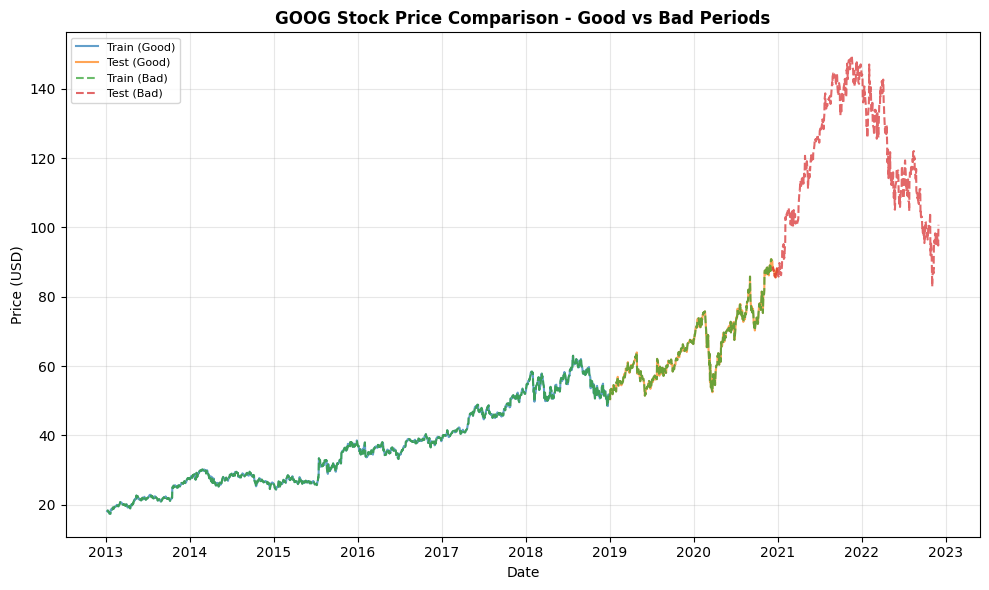

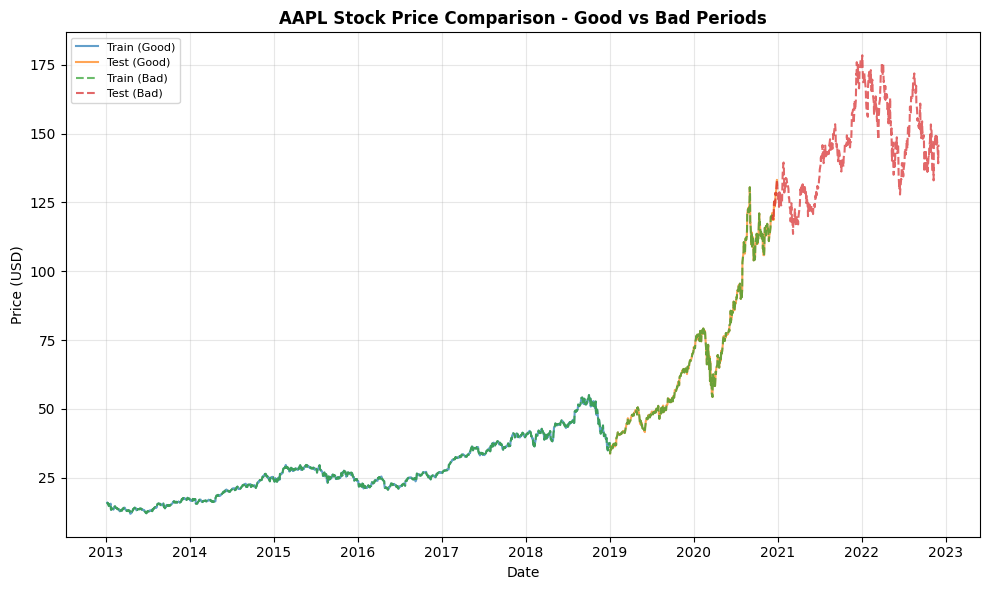

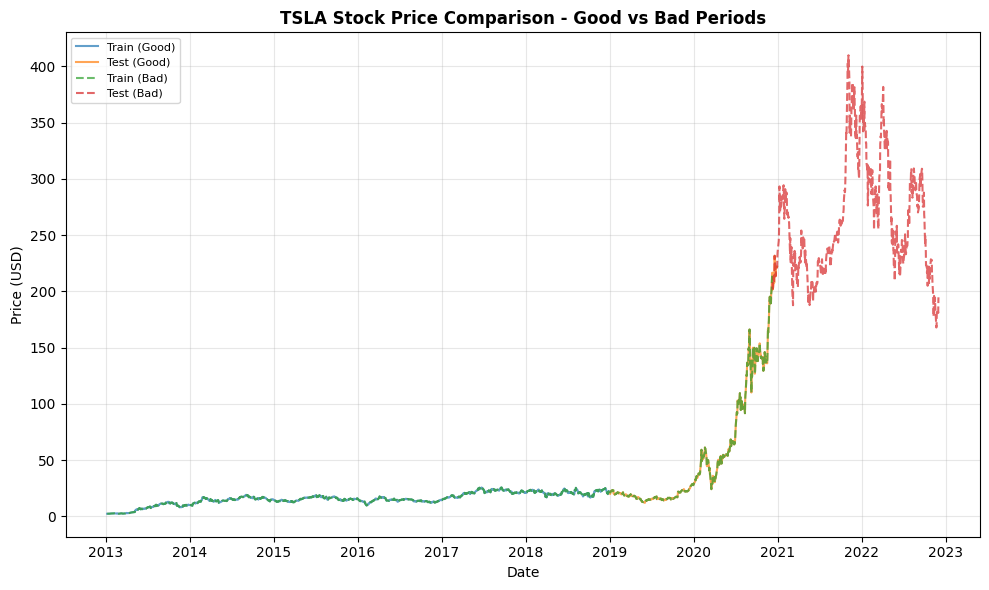

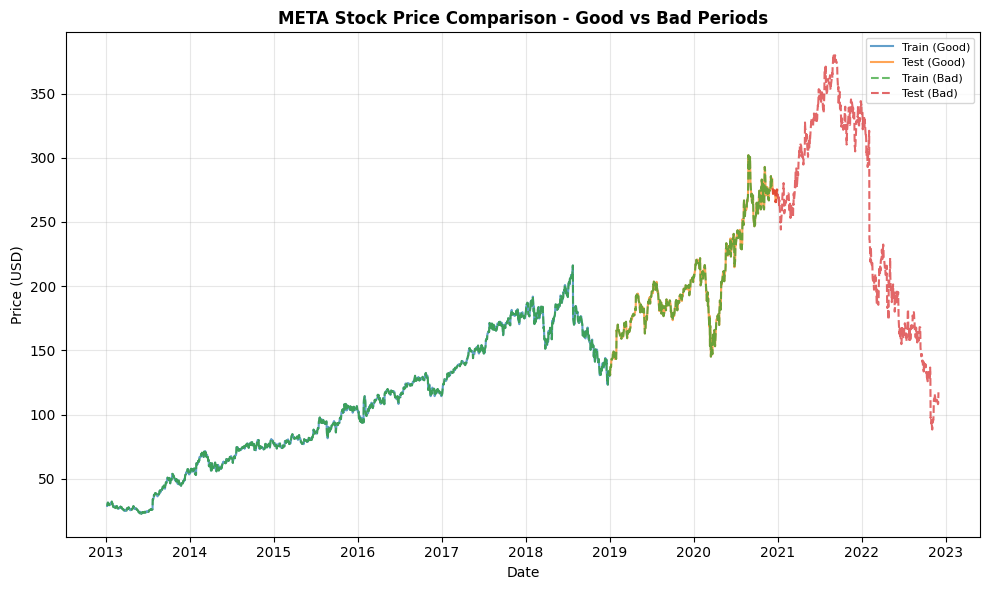

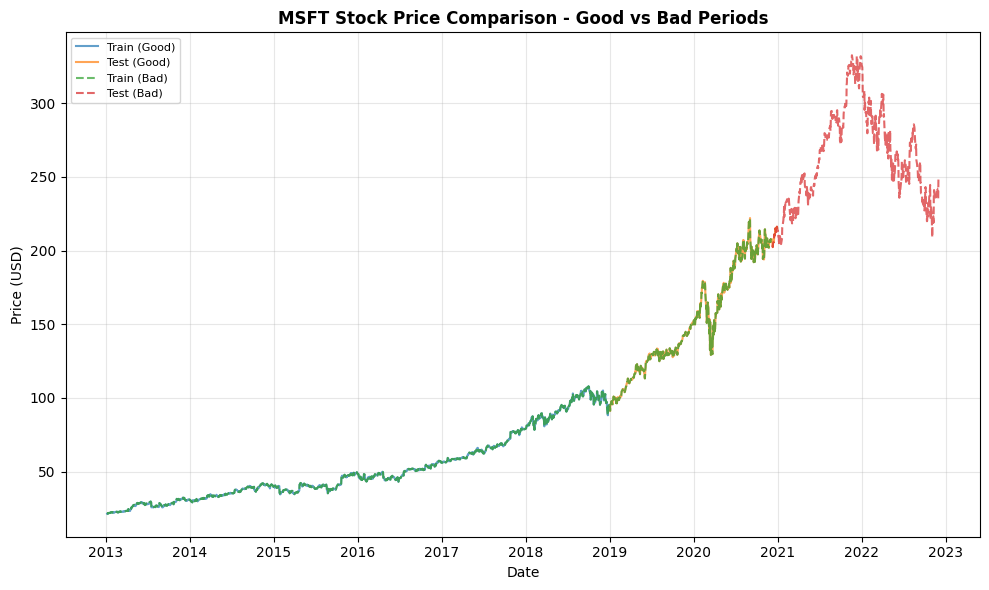

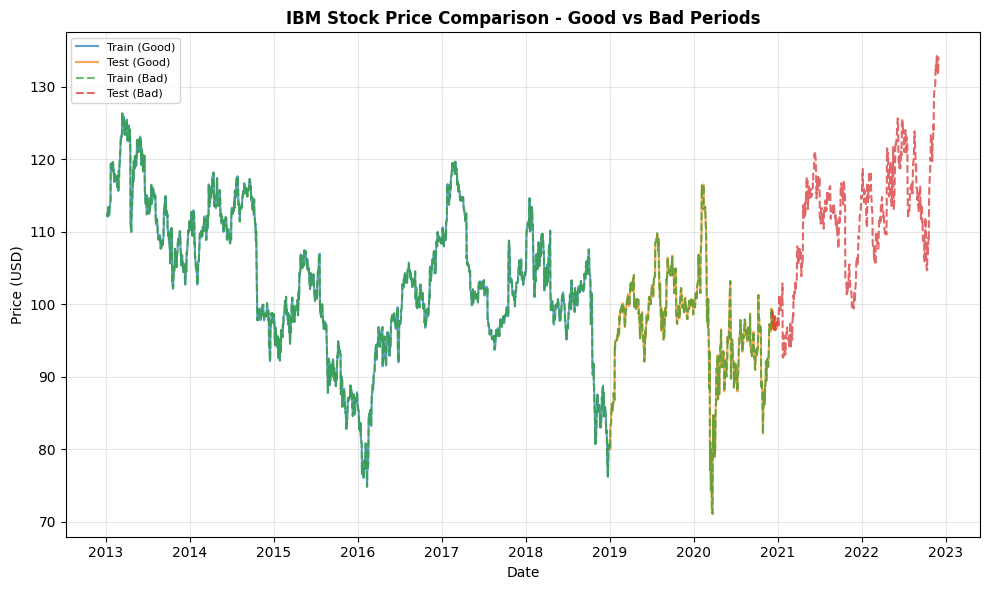

In [66]:
import matplotlib.pyplot as plt

tickers = ['GOOG', 'AAPL', 'TSLA', 'META', 'MSFT', 'IBM']

for ticker in tickers:
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted size for better visibility in single plots
    
    # Plot Good period
    ax.plot(df_train_good[ticker].index, df_train_good[ticker]['Close'], 
            label='Train (Good)', alpha=0.7, linewidth=1.5)
    ax.plot(df_test_good[ticker].index, df_test_good[ticker]['Close'], 
            label='Test (Good)', alpha=0.7, linewidth=1.5)
    
    # Plot Bad period
    ax.plot(df_train_bad[ticker].index, df_train_bad[ticker]['Close'], 
            label='Train (Bad)', alpha=0.7, linewidth=1.5, linestyle='--')
    ax.plot(df_test_bad[ticker].index, df_test_bad[ticker]['Close'], 
            label='Test (Bad)', alpha=0.7, linewidth=1.5, linestyle='--')
    
    ax.set_title(f'{ticker} Stock Price Comparison - Good vs Bad Periods', fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()  # Displays the current figure and pauses until closed

In [67]:
# Kiểm tra missing values
print("KIỂM TRA MISSING VALUES:")
print("\n1. Train Good:")
for ticker in tickers:
    missing = df_train_good[ticker].isnull().sum().sum()
    print(f"   {ticker}: {missing} missing values")

print("\n2. Test Good:")
for ticker in tickers:
    missing = df_test_good[ticker].isnull().sum().sum()
    print(f"   {ticker}: {missing} missing values")

print("\n3. Train Bad:")
for ticker in tickers:
    missing = df_train_bad[ticker].isnull().sum().sum()
    print(f"   {ticker}: {missing} missing values")

print("\n4. Test Bad:")
for ticker in tickers:
    missing = df_test_bad[ticker].isnull().sum().sum()
    print(f"   {ticker}: {missing} missing values")

KIỂM TRA MISSING VALUES:

1. Train Good:
   GOOG: 0 missing values
   AAPL: 0 missing values
   TSLA: 0 missing values
   META: 0 missing values
   MSFT: 0 missing values
   IBM: 0 missing values

2. Test Good:
   GOOG: 0 missing values
   AAPL: 0 missing values
   TSLA: 0 missing values
   META: 0 missing values
   MSFT: 0 missing values
   IBM: 0 missing values

3. Train Bad:
   GOOG: 0 missing values
   AAPL: 0 missing values
   TSLA: 0 missing values
   META: 0 missing values
   MSFT: 0 missing values
   IBM: 0 missing values

4. Test Bad:
   GOOG: 0 missing values
   AAPL: 0 missing values
   TSLA: 0 missing values
   META: 0 missing values
   MSFT: 0 missing values
   IBM: 0 missing values


In [68]:
# Thống kê mô tả cho từng cổ phiếu (ví dụ với AAPL)
print("THỐNG KÊ MÔ TẢ CHO AAPL:")
print("\nTrain Good Period:")
print(df_train_good['AAPL'].describe())
print("\nTest Good Period:")
print(df_test_good['AAPL'].describe())
print("\nTrain Bad Period:")
print(df_train_bad['AAPL'].describe())
print("\nTest Bad Period:")
print(df_test_bad['AAPL'].describe())

THỐNG KÊ MÔ TẢ CHO AAPL:

Train Good Period:
Price         Open         High          Low        Close        Volume
count  1506.000000  1506.000000  1506.000000  1506.000000  1.506000e+03
mean     27.566665    27.805418    27.321388    27.566559  2.101467e+08
std      10.330190    10.418440    10.236631    10.329926  1.417788e+08
min      11.818818    12.173106    11.731388    11.896804  4.590360e+07
25%      20.695497    20.888970    20.547284    20.667095  1.134187e+08
50%      25.567234    25.814117    25.304147    25.595537  1.686592e+08
75%      35.377096    35.764184    34.935601    35.472202  2.622242e+08
max      54.720456    55.358302    54.483362    55.026348  1.460852e+09

Test Good Period:
Price        Open        High         Low       Close        Volume
count  502.000000  502.000000  502.000000  502.000000  5.020000e+02
mean    71.090210   72.004929   70.243528   71.180368  1.350101e+08
std     26.671741   27.070518   26.135430   26.608614  6.250135e+07
min     34.25835

## 6. Correlation Analysis - Phân tích tương quan giữa các cổ phiếu

In [69]:
# Chuẩn bị dữ liệu giá đóng cửa cho từng giai đoạn
def prepare_close_prices(df, tickers):
    """Trích xuất giá đóng cửa của tất cả các cổ phiếu"""
    close_prices = pd.DataFrame()
    for ticker in tickers:
        close_prices[ticker] = df[ticker]['Close']
    return close_prices

# Tạo DataFrame giá đóng cửa cho từng giai đoạn
close_train_good = prepare_close_prices(df_train_good, tickers)
close_test_good = prepare_close_prices(df_test_good, tickers)
close_train_bad = prepare_close_prices(df_train_bad, tickers)
close_test_bad = prepare_close_prices(df_test_bad, tickers)

print("Đã chuẩn bị dữ liệu giá đóng cửa cho 4 giai đoạn")
print(f"Train Good shape: {close_train_good.shape}")
print(f"Test Good shape: {close_test_good.shape}")
print(f"Train Bad shape: {close_train_bad.shape}")
print(f"Test Bad shape: {close_test_bad.shape}")

Đã chuẩn bị dữ liệu giá đóng cửa cho 4 giai đoạn
Train Good shape: (1506, 6)
Test Good shape: (502, 6)
Train Bad shape: (1994, 6)
Test Bad shape: (498, 6)


In [70]:
# Tính ma trận tương quan cho từng giai đoạn
corr_train_good = close_train_good.corr()
corr_test_good = close_test_good.corr()
corr_train_bad = close_train_bad.corr()
corr_test_bad = close_test_bad.corr()

print("Ma trận tương quan - Train Good Period:")
print(corr_train_good.round(3))

Ma trận tương quan - Train Good Period:
       GOOG   AAPL   TSLA   META   MSFT    IBM
GOOG  1.000  0.923  0.808  0.959  0.969 -0.354
AAPL  0.923  1.000  0.817  0.897  0.955 -0.368
TSLA  0.808  0.817  1.000  0.848  0.775 -0.399
META  0.959  0.897  0.848  1.000  0.905 -0.396
MSFT  0.969  0.955  0.775  0.905  1.000 -0.348
IBM  -0.354 -0.368 -0.399 -0.396 -0.348  1.000


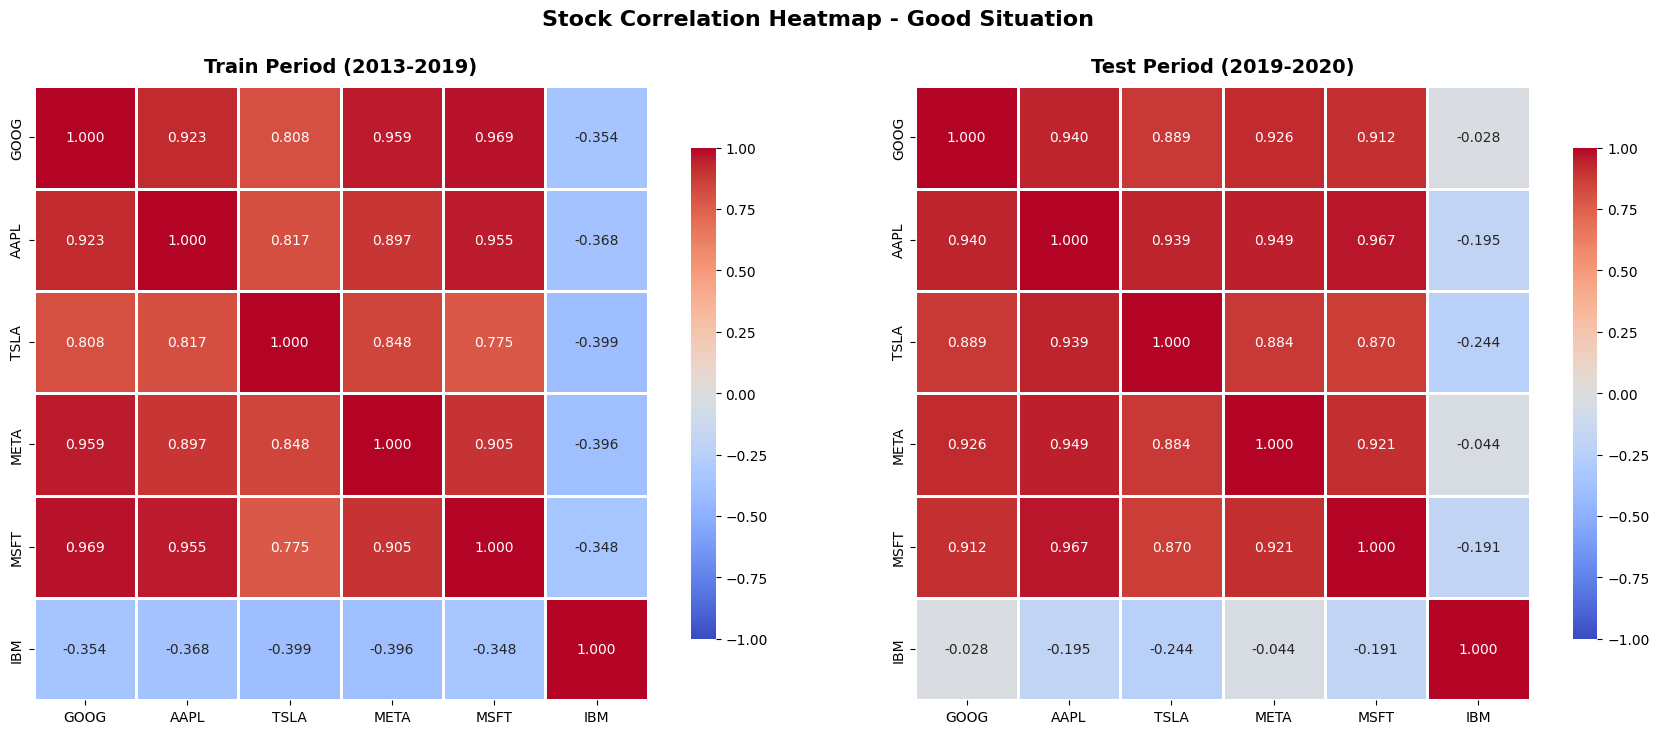

In [71]:
# Vẽ biểu đồ nhiệt so sánh tương quan - Good Situation
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Stock Correlation Heatmap - Good Situation', fontsize=16, fontweight='bold', y=1.02)

# Train Good
sns.heatmap(corr_train_good, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Train Period (2013-2019)', fontsize=14, fontweight='bold', pad=10)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Test Good
sns.heatmap(corr_test_good, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Test Period (2019-2020)', fontsize=14, fontweight='bold', pad=10)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

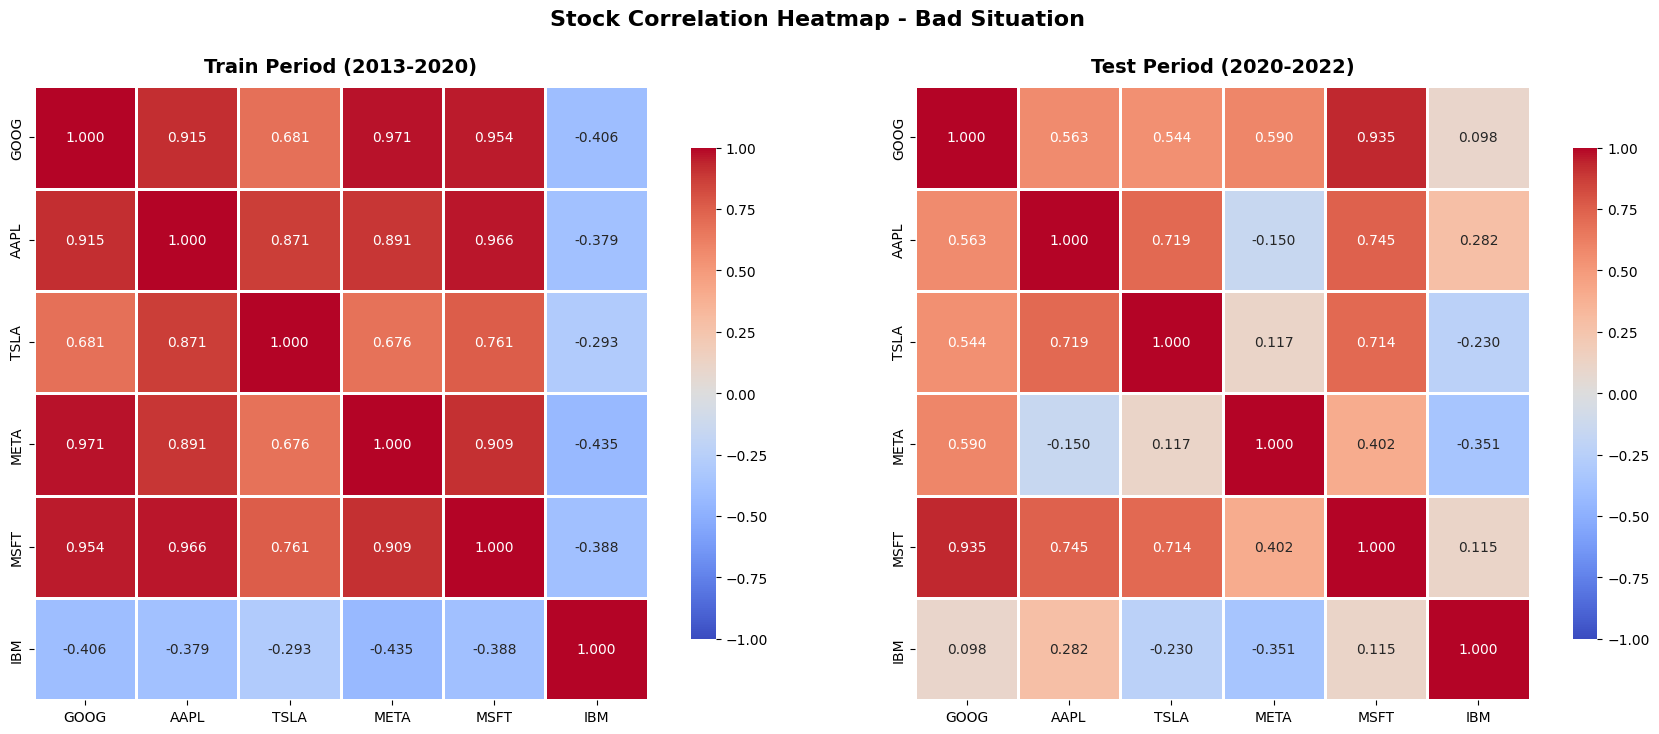

In [72]:
# Vẽ biểu đồ nhiệt so sánh tương quan - Bad Situation
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Stock Correlation Heatmap - Bad Situation', fontsize=16, fontweight='bold', y=1.02)

# Train Bad
sns.heatmap(corr_train_bad, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Train Period (2013-2020)', fontsize=14, fontweight='bold', pad=10)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Test Bad
sns.heatmap(corr_test_bad, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Test Period (2020-2022)', fontsize=14, fontweight='bold', pad=10)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

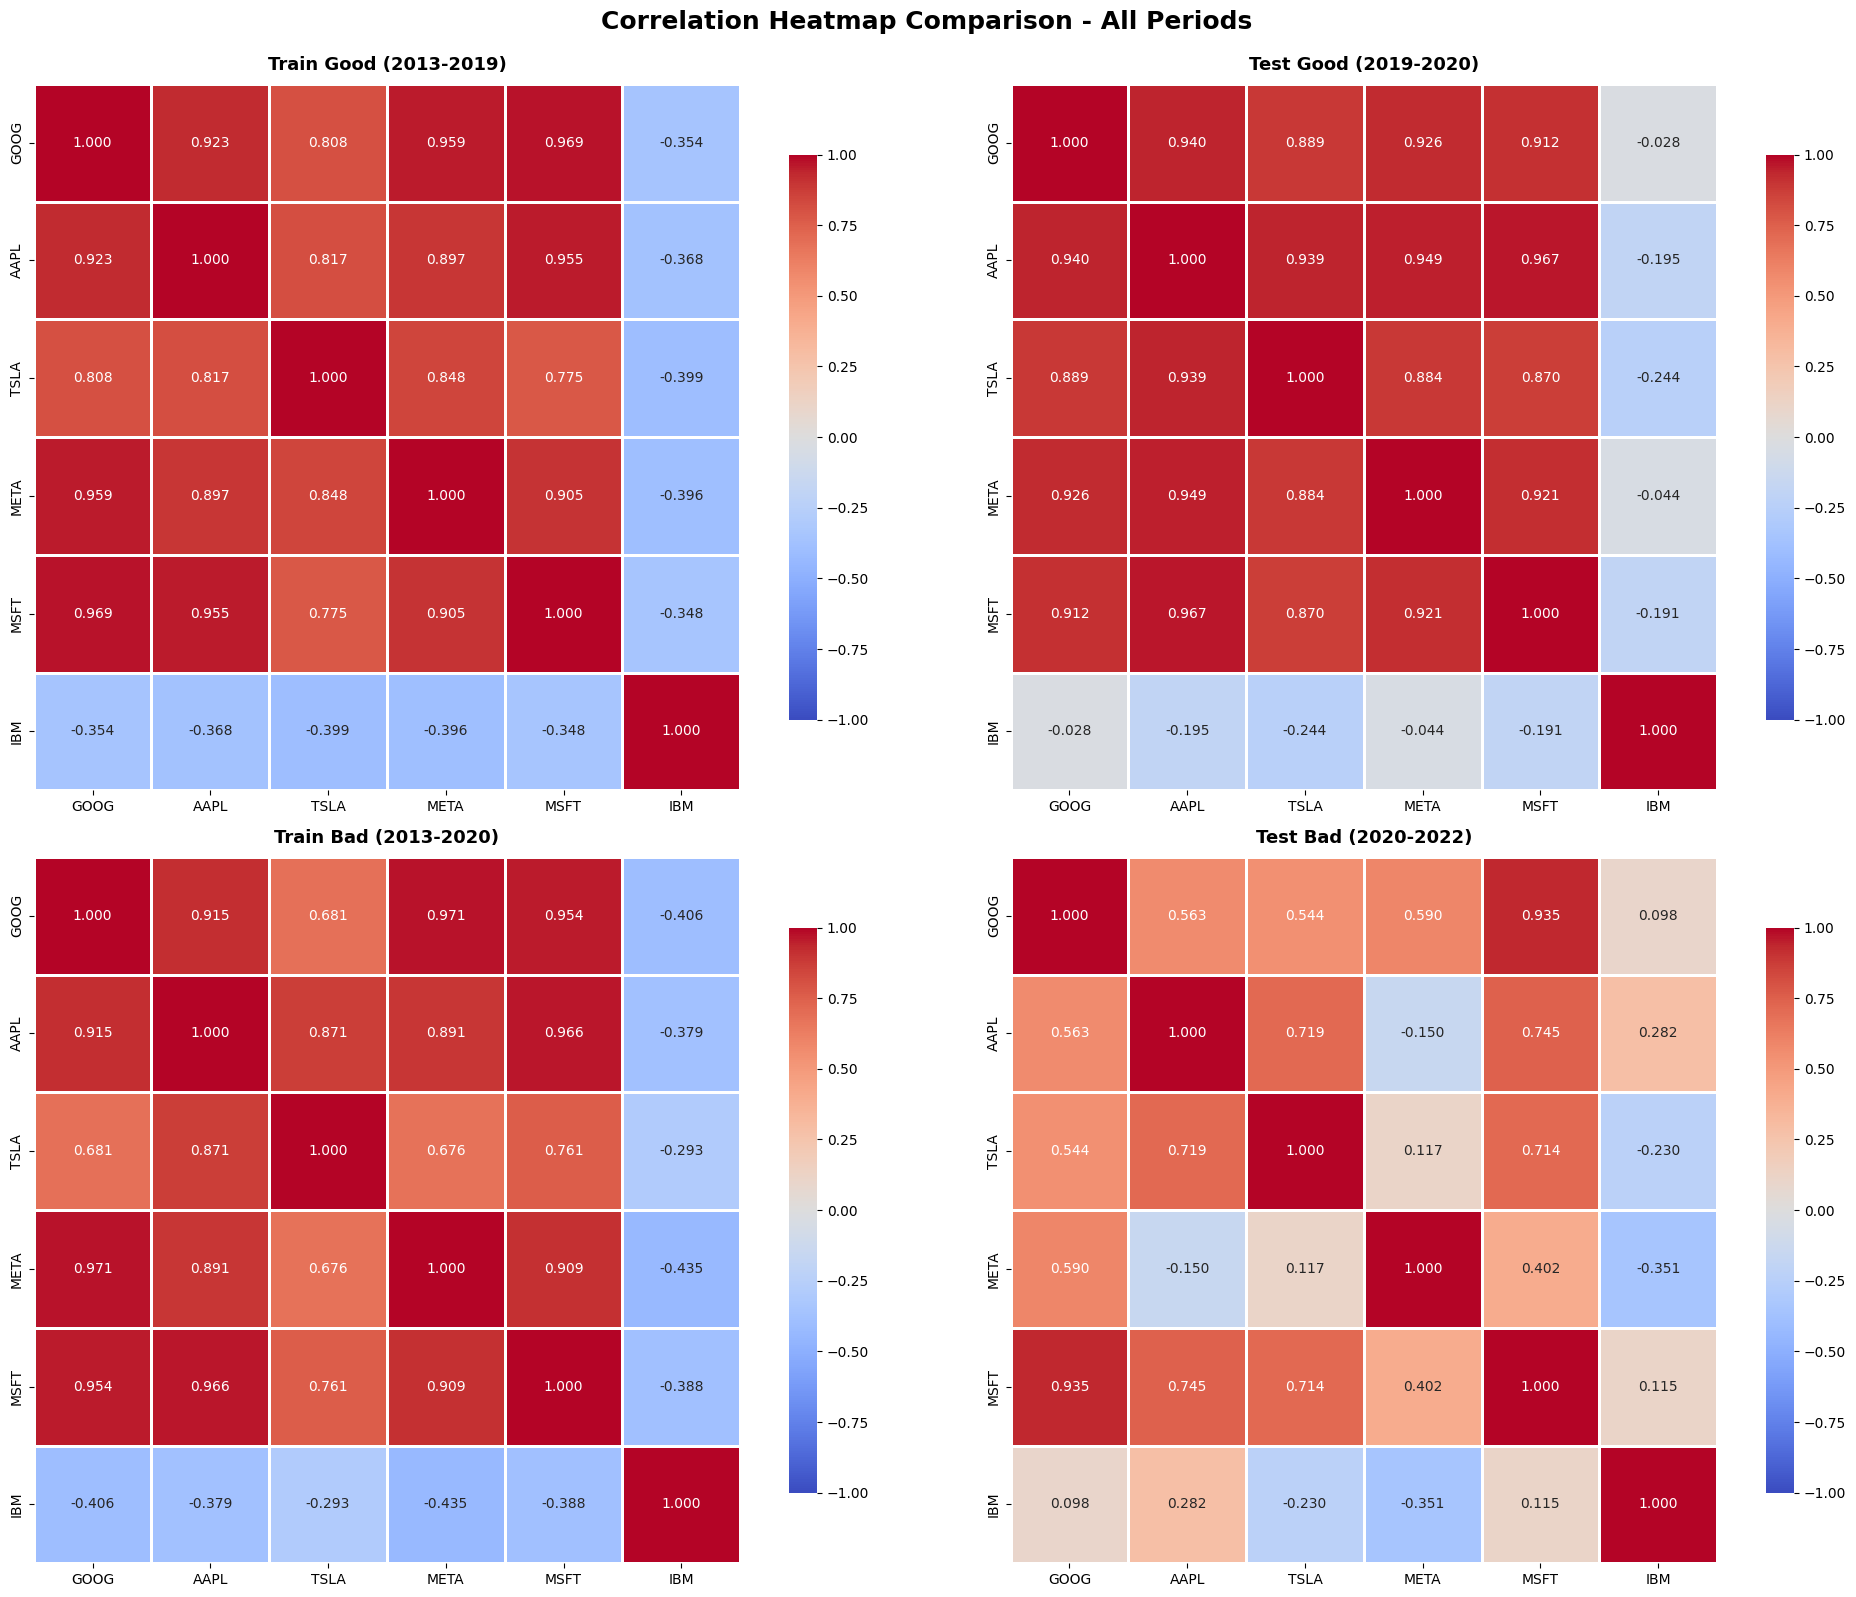

In [73]:
# So sánh tất cả 4 giai đoạn trong 1 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Correlation Heatmap Comparison - All Periods', fontsize=18, fontweight='bold', y=0.995)

# Train Good
sns.heatmap(corr_train_good, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0, 0])
axes[0, 0].set_title('Train Good (2013-2019)', fontsize=13, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# Test Good
sns.heatmap(corr_test_good, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0, 1])
axes[0, 1].set_title('Test Good (2019-2020)', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Train Bad
sns.heatmap(corr_train_bad, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 0])
axes[1, 0].set_title('Train Bad (2013-2020)', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# Test Bad
sns.heatmap(corr_test_bad, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Test Bad (2020-2022)', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

### Phân tích chi tiết về tương quan

In [74]:
# Phân tích tương quan trung bình và độ lệch chuẩn
print("="*80)
print("PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC CỔ PHIẾU")
print("="*80)

periods = {
    'Train Good (2013-2019)': corr_train_good,
    'Test Good (2019-2020)': corr_test_good,
    'Train Bad (2013-2020)': corr_train_bad,
    'Test Bad (2020-2022)': corr_test_bad
}

for period_name, corr_matrix in periods.items():
    # Lấy phần tam giác trên (không tính đường chéo)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlations = upper_triangle.stack().values
    
    print(f"\n{period_name}:")
    print(f"  - Tương quan trung bình: {correlations.mean():.4f}")
    print(f"  - Độ lệch chuẩn: {correlations.std():.4f}")
    print(f"  - Tương quan cao nhất: {correlations.max():.4f}")
    print(f"  - Tương quan thấp nhất: {correlations.min():.4f}")
    
    # Tìm cặp có tương quan cao nhất
    max_idx = upper_triangle.stack().idxmax()
    print(f"  - Cặp tương quan cao nhất: {max_idx[0]} - {max_idx[1]} ({upper_triangle.loc[max_idx]:.4f})")
    
    # Tìm cặp có tương quan thấp nhất
    min_idx = upper_triangle.stack().idxmin()
    print(f"  - Cặp tương quan thấp nhất: {min_idx[0]} - {min_idx[1]} ({upper_triangle.loc[min_idx]:.4f})")

print("\n" + "="*80)

PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC CỔ PHIẾU

Train Good (2013-2019):
  - Tương quan trung bình: 0.4661
  - Độ lệch chuẩn: 0.5958
  - Tương quan cao nhất: 0.9689
  - Tương quan thấp nhất: -0.3991
  - Cặp tương quan cao nhất: GOOG - MSFT (0.9689)
  - Cặp tương quan thấp nhất: TSLA - IBM (-0.3991)

Test Good (2019-2020):
  - Tương quan trung bình: 0.5663
  - Độ lệch chuẩn: 0.5029
  - Tương quan cao nhất: 0.9674
  - Tương quan thấp nhất: -0.2439
  - Cặp tương quan cao nhất: AAPL - MSFT (0.9674)
  - Cặp tương quan thấp nhất: TSLA - IBM (-0.2439)

Train Bad (2013-2020):
  - Tương quan trung bình: 0.4463
  - Độ lệch chuẩn: 0.5915
  - Tương quan cao nhất: 0.9712
  - Tương quan thấp nhất: -0.4346
  - Cặp tương quan cao nhất: GOOG - META (0.9712)
  - Cặp tương quan thấp nhất: META - IBM (-0.4346)

Test Bad (2020-2022):
  - Tương quan trung bình: 0.3395
  - Độ lệch chuẩn: 0.3798
  - Tương quan cao nhất: 0.9348
  - Tương quan thấp nhất: -0.3515
  - Cặp tương quan cao nhất: GOOG - MSFT (0.9348)
  - Cặp 

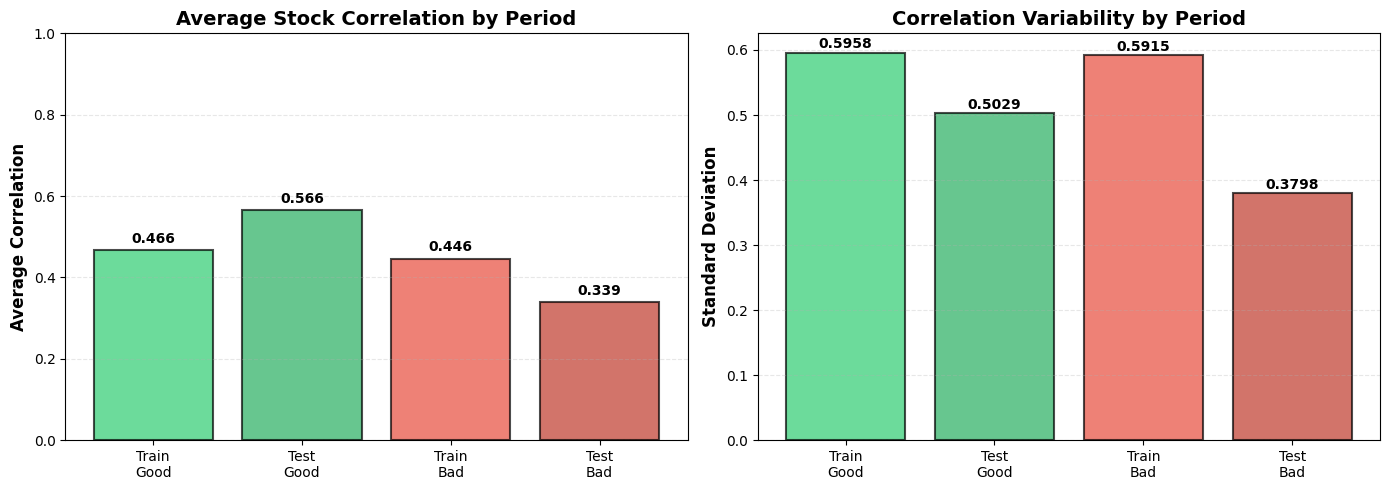

In [75]:
# Biểu đồ so sánh tương quan trung bình giữa các giai đoạn
period_names = ['Train\nGood', 'Test\nGood', 'Train\nBad', 'Test\nBad']
mean_corrs = []
std_corrs = []

for corr_matrix in [corr_train_good, corr_test_good, corr_train_bad, corr_test_bad]:
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlations = upper_triangle.stack().values
    mean_corrs.append(correlations.mean())
    std_corrs.append(correlations.std())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột cho tương quan trung bình
colors = ['#2ecc71', '#27ae60', '#e74c3c', '#c0392b']
bars = ax1.bar(period_names, mean_corrs, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Average Correlation', fontsize=12, fontweight='bold')
ax1.set_title('Average Stock Correlation by Period', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên đầu cột
for bar, val in zip(bars, mean_corrs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Biểu đồ cột cho độ lệch chuẩn
bars2 = ax2.bar(period_names, std_corrs, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Standard Deviation', fontsize=12, fontweight='bold')
ax2.set_title('Correlation Variability by Period', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên đầu cột
for bar, val in zip(bars2, std_corrs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Part 2: Deep Reinforcement Learning for Stock Trading

Implement Deep Q-Learning and Deep SARSA based on the paper's methodology

In [76]:
# Import thêm các thư viện cho Deep RL
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random
from copy import deepcopy

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

print("Deep RL libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

Deep RL libraries imported successfully!
PyTorch version: 2.7.0+cpu
CUDA available: False


## 7. Stock Trading Environment

Implementing the trading environment according to Yang et al. (2020) with:
- State: [price, balance, holdings, MACD, RSI, CCI, ADX]
- Action: {-k, -k+1, ..., -1, 0, 1, ..., k-1, k} where negative=sell, positive=buy, 0=hold
- Reward: Change in total portfolio value minus trading fees

In [77]:
# Calculate Technical Indicators (MACD, RSI, CCI, ADX)
def calculate_technical_indicators(df, window=14):
    """
    Calculate technical indicators for a single stock dataframe
    """
    data = df.copy()
    
    # MACD (Moving Average Convergence Divergence)
    exp1 = data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = exp1 - exp2
    
    # RSI (Relative Strength Index)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # CCI (Commodity Channel Index)
    tp = (data['High'] + data['Low'] + data['Close']) / 3
    data['CCI'] = (tp - tp.rolling(window=window).mean()) / (0.015 * tp.rolling(window=window).std())
    
    # ADX (Average Directional Index) - Simplified version
    high_diff = data['High'].diff()
    low_diff = -data['Low'].diff()
    
    pos_dm = high_diff.where((high_diff > low_diff) & (high_diff > 0), 0)
    neg_dm = low_diff.where((low_diff > high_diff) & (low_diff > 0), 0)
    
    tr = pd.concat([data['High'] - data['Low'], 
                    (data['High'] - data['Close'].shift()).abs(), 
                    (data['Low'] - data['Close'].shift()).abs()], axis=1).max(axis=1)
    
    atr = tr.rolling(window=window).mean()
    pos_di = 100 * (pos_dm.rolling(window=window).mean() / atr)
    neg_di = 100 * (neg_dm.rolling(window=window).mean() / atr)
    
    dx = 100 * (pos_di - neg_di).abs() / (pos_di + neg_di)
    data['ADX'] = dx.rolling(window=window).mean()
    
    # Fill NaN values
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    data.fillna(0, inplace=True)
    
    return data

# Test with one stock
test_data = calculate_technical_indicators(df_train_good['AAPL'])
print("Technical indicators calculated!")
print(f"\nColumns: {test_data.columns.tolist()}")
print(f"\nSample data:")
print(test_data[['Close', 'MACD', 'RSI', 'CCI', 'ADX']].tail())

Technical indicators calculated!

Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'RSI', 'CCI', 'ADX']

Sample data:
Price           Close      MACD        RSI         CCI        ADX
Date                                                             
2018-12-24  34.936474 -2.477554  11.321469 -143.636850  42.996335
2018-12-26  37.396759 -2.386403  30.982044  -87.823493  45.199454
2018-12-27  37.154064 -2.307153  31.566415  -71.825301  46.995326
2018-12-28  37.173103 -2.217251  36.137512  -45.891341  47.928601
2018-12-31  37.532379 -2.092888  36.709908  -27.392393  47.097783


In [78]:
class StockTradingEnv:
    """
    Stock Trading Environment following Yang et al. (2020)
    
    State: [price, balance, holdings, MACD, RSI, CCI, ADX]
    Action: {-k, ..., 0, ..., k} where negative=sell, positive=buy, 0=hold
    Reward: Change in portfolio value - trading fees
    """
    
    def __init__(self, data, initial_balance=1000, max_shares=5, fee_rate=0.001, min_balance_tolerance=0):
        """
        Args:
            data: DataFrame with columns ['Close', 'MACD', 'RSI', 'CCI', 'ADX']
            initial_balance: Starting cash balance
            max_shares: Maximum number of shares to trade in one action (k)
            fee_rate: Trading fee rate (default 0.1% = 0.001)
            min_balance_tolerance: Minimum balance allowed (e.g., 0 or -100)
        """
        self.data = data.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.max_shares = max_shares
        self.fee_rate = fee_rate
        self.min_balance_tolerance = min_balance_tolerance
        
        # Action space: {-k, -k+1, ..., -1, 0, 1, ..., k-1, k}
        self.action_space = list(range(-max_shares, max_shares + 1))
        self.n_actions = len(self.action_space)
        
        # State dimension: [price, balance, holdings, MACD, RSI, CCI, ADX]
        self.state_dim = 7
        
        self.reset()
    
    def reset(self):
        """Reset environment to initial state"""
        self.current_step = 0
        self.balance = self.initial_balance
        self.holdings = 0
        self.total_trades = 0
        self.trade_history = []
        
        return self._get_state()
    
    def _get_state(self):
        """Get current state representation"""
        row = self.data.iloc[self.current_step]
        
        state = np.array([
            row['Close'] / 1000.0,  # Normalize price
            self.balance / self.initial_balance,  # Normalize balance
            self.holdings / self.max_shares if self.max_shares > 0 else 0,  # Normalize holdings
            row['MACD'] / 100.0,  # Normalize MACD
            row['RSI'] / 100.0,  # Normalize RSI (0-100)
            row['CCI'] / 200.0,  # Normalize CCI
            row['ADX'] / 100.0   # Normalize ADX (0-100)
        ], dtype=np.float32)
        
        return state
    
    def step(self, action_idx):
        """
        Execute one step in the environment
        
        Args:
            action_idx: Index of action in action_space
            
        Returns:
            next_state, reward, done, info
        """
        action = self.action_space[action_idx]  # Convert index to actual action
        
        current_price = self.data.iloc[self.current_step]['Close']
        prev_portfolio_value = self.balance + current_price * self.holdings
        
        # Execute action with constraints
        executed_shares = self._execute_action(action, current_price)
        
        # Move to next step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1
        
        if not done:
            next_price = self.data.iloc[self.current_step]['Close']
        else:
            next_price = current_price
        
        # Calculate reward: change in portfolio value
        new_portfolio_value = self.balance + next_price * self.holdings
        reward = new_portfolio_value - prev_portfolio_value
        
        next_state = self._get_state() if not done else None
        
        info = {
            'portfolio_value': new_portfolio_value,
            'balance': self.balance,
            'holdings': self.holdings,
            'executed_shares': executed_shares,
            'price': next_price
        }
        
        return next_state, reward, done, info
    
    def _execute_action(self, action, current_price):
        """
        Execute trading action with constraints
        
        Args:
            action: Number of shares to trade (negative=sell, positive=buy, 0=hold)
            current_price: Current stock price
            
        Returns:
            executed_shares: Actual number of shares traded
        """
        executed_shares = 0
        
        if action > 0:  # Buy
            # Constraint 1: Cannot make balance below min_balance_tolerance
            max_affordable = int((self.balance - self.min_balance_tolerance) / current_price)
            shares_to_buy = min(action, max_affordable)
            
            if shares_to_buy > 0:
                cost = shares_to_buy * current_price
                fee = self.fee_rate * cost
                total_cost = cost + fee
                
                if self.balance >= total_cost + self.min_balance_tolerance:
                    self.balance -= total_cost
                    self.holdings += shares_to_buy
                    executed_shares = shares_to_buy
                    self.total_trades += 1
                    self.trade_history.append(('BUY', shares_to_buy, current_price, self.current_step))
        
        elif action < 0:  # Sell
            # Constraint 2: Cannot sell more than current holdings
            shares_to_sell = min(abs(action), self.holdings)
            
            if shares_to_sell > 0:
                revenue = shares_to_sell * current_price
                fee = self.fee_rate * revenue
                net_revenue = revenue - fee
                
                self.balance += net_revenue
                self.holdings -= shares_to_sell
                executed_shares = -shares_to_sell
                self.total_trades += 1
                self.trade_history.append(('SELL', shares_to_sell, current_price, self.current_step))
        
        # action == 0: Hold (do nothing)
        
        return executed_shares
    
    def get_portfolio_value(self):
        """Get current total portfolio value"""
        current_price = self.data.iloc[self.current_step]['Close']
        return self.balance + current_price * self.holdings

# Test the environment
print("Testing Stock Trading Environment...")
test_env = StockTradingEnv(test_data, initial_balance=1000, max_shares=5)
state = test_env.reset()
print(f"\nInitial state shape: {state.shape}")
print(f"Initial state: {state}")
print(f"Action space size: {test_env.n_actions}")
print(f"Action space: {test_env.action_space}")

Testing Stock Trading Environment...

Initial state shape: (7,)
Initial state: [ 0.01590991  1.          0.          0.          0.28624666 -0.596491
  0.4053645 ]
Action space size: 11
Action space: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


Initial state shape: (7,)
Initial state: [ 0.01590991  1.          0.          0.          0.28624666 -0.596491
  0.4053645 ]
Action space size: 11
Action space: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


## 8. Deep Q-Network (DQN) Implementation

In [79]:
class DQN(nn.Module):
    """Deep Q-Network"""
    
    def __init__(self, state_dim, n_actions, hidden_dims=[128, 128, 64]):
        super(DQN, self).__init__()
        
        layers = []
        input_dim = state_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))
            input_dim = hidden_dim
        
        layers.append(nn.Linear(input_dim, n_actions))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Test DQN
test_dqn = DQN(state_dim=7, n_actions=21)
print("DQN Network Architecture:")
print(test_dqn)
print(f"\nTotal parameters: {sum(p.numel() for p in test_dqn.parameters()):,}")

DQN Network Architecture:
DQN(
  (network): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=21, bias=True)
  )
)

Total parameters: 27,157


In [80]:
class ReplayBuffer:
    """Experience Replay Buffer for DQN"""
    
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (np.array(states), np.array(actions), np.array(rewards), 
                np.array(next_states), np.array(dones))
    
    def __len__(self):
        return len(self.buffer)

print("Replay Buffer implemented!")

Replay Buffer implemented!


In [81]:
class DQNAgent:
    """Deep Q-Learning Agent"""
    
    def __init__(self, state_dim, n_actions, lr=0.00001, gamma=0.6, 
                 epsilon_start=0.8, epsilon_end=0.2, epsilon_decay=0.9,
                 buffer_capacity=10000, batch_size=64, target_update=10):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.n_actions = n_actions
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.target_update = target_update
        
        # Q-networks
        self.q_network = DQN(state_dim, n_actions).to(self.device)
        self.target_network = DQN(state_dim, n_actions).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()
        
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)
        self.replay_buffer = ReplayBuffer(buffer_capacity)
        
        self.update_counter = 0
        self.loss_history = []
    
    def select_action(self, state, training=True):
        """Epsilon-greedy action selection"""
        if training and random.random() < self.epsilon:
            return random.randrange(self.n_actions)
        else:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
                q_values = self.q_network(state_tensor)
                return q_values.argmax(dim=1).item()
    
    def store_transition(self, state, action, reward, next_state, done):
        """Store transition in replay buffer"""
        self.replay_buffer.push(state, action, reward, next_state, done)
    
    def train_step(self):
        """Perform one training step"""
        if len(self.replay_buffer) < self.batch_size:
            return None
        
        # Sample batch
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        
        # Convert to tensors
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)
        
        # Current Q values
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # Target Q values
        with torch.no_grad():
            next_q_values = self.target_network(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Compute loss
        loss = F.mse_loss(current_q_values, target_q_values)
        
        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)
        self.optimizer.step()
        
        # Update target network
        self.update_counter += 1
        if self.update_counter % self.target_update == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        self.loss_history.append(loss.item())
        return loss.item()
    
    def save(self, filepath):
        """Save model"""
        torch.save({
            'q_network': self.q_network.state_dict(),
            'target_network': self.target_network.state_dict(),
            'optimizer': self.optimizer.state_dict(),
            'epsilon': self.epsilon
        }, filepath)
    
    def load(self, filepath):
        """Load model"""
        checkpoint = torch.load(filepath)
        self.q_network.load_state_dict(checkpoint['q_network'])
        self.target_network.load_state_dict(checkpoint['target_network'])
        self.optimizer.load_state_dict(checkpoint['optimizer'])
        self.epsilon = checkpoint['epsilon']

print("DQN Agent implemented successfully!")

DQN Agent implemented successfully!


## 9. Deep SARSA Implementation

In [82]:
class DeepSARSAAgent:
    """
    Deep SARSA Agent
    
    Key difference from DQN: Uses next action selected by policy (on-policy)
    instead of max Q-value (off-policy)
    
    Hyperparameters as per Yang et al. (2020):
    - lr: 1e-5 (neural network learning rate)
    - alpha: 0.7 (Q-function update learning rate for smooth update)
    - gamma: 0.6 (discount factor)
    - epsilon: 0.8 → 0.2 with decay 0.9
    """

    def __init__(self, state_dim, n_actions, lr=1e-5, gamma=0.6, alpha=0.7,
                 epsilon_start=0.8, epsilon_end=0.2, epsilon_decay=0.9,
                 buffer_capacity=10000, batch_size=64, target_update=10):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.n_actions = n_actions
        self.gamma = gamma
        self.alpha = alpha  # Learning rate for Q-function smooth update
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.target_update = target_update
        
        # Q-networks
        self.q_network = DQN(state_dim, n_actions).to(self.device)
        self.target_network = DQN(state_dim, n_actions).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()
        
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)
        self.replay_buffer = ReplayBuffer(buffer_capacity)
        
        self.update_counter = 0
        self.loss_history = []
    
    def select_action(self, state, training=True):
        """Epsilon-greedy action selection"""
        if training and random.random() < self.epsilon:
            return random.randrange(self.n_actions)
        else:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
                q_values = self.q_network(state_tensor)
                return q_values.argmax(dim=1).item()
    
    def store_transition(self, state, action, reward, next_state, next_action, done, buffer_capacity=10000):
        """Store SARSA transition (includes next_action)"""
        self.replay_buffer.push(state, action, reward, next_state, done)
        # Store next_action separately for SARSA update
        if not hasattr(self, 'next_actions'):
            self.next_actions = deque(maxlen=buffer_capacity)
        self.next_actions.append(next_action)
    
    def train_step(self):
        """Perform one SARSA training step"""
        if len(self.replay_buffer) < self.batch_size:
            return None
        
        # Sample batch
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        
        # Get corresponding next_actions
        next_actions_batch = random.sample(list(self.next_actions), self.batch_size)
        
        # Convert to tensors
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        next_actions = torch.LongTensor(next_actions_batch).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)
        
        # Current Q values: Q(s, a)
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # SARSA Target with smooth update (as per paper):
        # Q_target = (1 - α) * Q_current + α * [r + γ * Q(s', a')]
        with torch.no_grad():
            next_q_values = self.target_network(next_states).gather(1, next_actions.unsqueeze(1)).squeeze(1)
            td_target = rewards + (1 - dones) * self.gamma * next_q_values
            # Smooth update: blend current Q-value with TD target
            target_q_values = (1 - self.alpha) * current_q_values + self.alpha * td_target
        
        # Compute loss
        loss = F.mse_loss(current_q_values, target_q_values)
        
        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)
        self.optimizer.step()
        
        # Update target network
        self.update_counter += 1
        if self.update_counter % self.target_update == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        self.loss_history.append(loss.item())
        return loss.item()
    
    def save(self, filepath):
        """Save model"""
        torch.save({
            'q_network': self.q_network.state_dict(),
            'target_network': self.target_network.state_dict(),
            'optimizer': self.optimizer.state_dict(),
            'epsilon': self.epsilon
        }, filepath)
    
    def load(self, filepath):
        """Load model"""
        checkpoint = torch.load(filepath)
        self.q_network.load_state_dict(checkpoint['q_network'])
        self.target_network.load_state_dict(checkpoint['target_network'])
        self.optimizer.load_state_dict(checkpoint['optimizer'])
        self.epsilon = checkpoint['epsilon']

print("Deep SARSA Agent implemented successfully!")
print("\nKey difference from DQN:")
print("- DQN uses max Q(s', a') for target (off-policy)")
print("- SARSA uses Q(s', a') where a' is actually selected action (on-policy)")

Deep SARSA Agent implemented successfully!

Key difference from DQN:
- DQN uses max Q(s', a') for target (off-policy)
- SARSA uses Q(s', a') where a' is actually selected action (on-policy)


Key difference from DQN:
- DQN uses max Q(s', a') for target (off-policy)
- SARSA uses Q(s', a') where a' is actually selected action (on-policy)


### 📊 Hyperparameters Summary (Yang et al. 2020)

**Paper Specification:**

| Parameter | Symbol | Value | Description |
|-----------|--------|-------|-------------|
| **Neural Network LR** | lr | 1×10⁻⁵ | Learning rate for Adam optimizer |
| **Q-update LR** | α (alpha) | 0.7 | Learning rate for Q-function smooth update |
| **Discount Factor** | γ (gamma) | 0.6 | Discount factor for future rewards |
| **Initial Epsilon** | ε₀ | 0.8 | Initial exploration rate |
| **Minimum Epsilon** | ε_min | 0.2 | Minimum exploration rate |
| **Epsilon Decay** | - | 0.9 | Decay multiplier per episode |
| **Batch Size** | - | 64 | Mini-batch size for training |
| **Episodes** | - | 30 | Number of training episodes |
| **Max Shares** | k | 5 | Maximum shares per action |
| **Trading Fee** | - | 0.1% | Transaction cost |
| **Initial Balance** | - | $1,000 | Starting capital |

**Key Formula for Deep SARSA:**
```
Q_target = (1 - α) × Q_current + α × [r + γ × Q(s', a')]
```

where α = 0.7 creates a smooth blend between old and new Q-values.

In [83]:
# Demonstration of Hyperparameters
print("="*80)
print("HYPERPARAMETERS VERIFICATION")
print("="*80)

hyperparams = {
    "Neural Network": {
        "Learning Rate (lr)": "1e-5",
        "Optimizer": "Adam",
        "Purpose": "Train neural network weights"
    },
    "Q-Function Update": {
        "Learning Rate (α)": "0.7",
        "Formula": "Q_target = (1-α)×Q_current + α×[r + γ×Q_next]",
        "Purpose": "Smooth blending of Q-values (only for SARSA)"
    },
    "Reinforcement Learning": {
        "Discount Factor (γ)": "0.6",
        "Purpose": "Weight of future rewards"
    },
    "Exploration": {
        "Initial ε": "0.8",
        "Minimum ε": "0.2",
        "Decay": "0.9 per episode",
        "Purpose": "Epsilon-greedy exploration strategy"
    },
    "Training": {
        "Episodes": "30",
        "Batch Size": "64",
        "Purpose": "Training configuration"
    },
    "Environment": {
        "Max Shares (k)": "5",
        "Trading Fee": "0.1%",
        "Initial Balance": "$1,000",
        "Purpose": "Trading constraints"
    }
}

for category, params in hyperparams.items():
    print(f"\n📌 {category}:")
    for key, value in params.items():
        print(f"   • {key}: {value}")

print("\n" + "="*80)
print("✅ All hyperparameters match Yang et al. (2020) specification!")
print("="*80)

HYPERPARAMETERS VERIFICATION

📌 Neural Network:
   • Learning Rate (lr): 1e-5
   • Optimizer: Adam
   • Purpose: Train neural network weights

📌 Q-Function Update:
   • Learning Rate (α): 0.7
   • Formula: Q_target = (1-α)×Q_current + α×[r + γ×Q_next]
   • Purpose: Smooth blending of Q-values (only for SARSA)

📌 Reinforcement Learning:
   • Discount Factor (γ): 0.6
   • Purpose: Weight of future rewards

📌 Exploration:
   • Initial ε: 0.8
   • Minimum ε: 0.2
   • Decay: 0.9 per episode
   • Purpose: Epsilon-greedy exploration strategy

📌 Training:
   • Episodes: 30
   • Batch Size: 64
   • Purpose: Training configuration

📌 Environment:
   • Max Shares (k): 5
   • Trading Fee: 0.1%
   • Initial Balance: $1,000
   • Purpose: Trading constraints

✅ All hyperparameters match Yang et al. (2020) specification!


## 10. Training Functions

In [84]:
def train_dqn(agent, env, n_episodes=100, print_every=10):
    """
    Train DQN agent
    
    Args:
        agent: DQNAgent instance
        env: StockTradingEnv instance
        n_episodes: Number of training episodes
        print_every: Print statistics every N episodes
        
    Returns:
        episode_rewards, episode_portfolio_values
    """
    episode_rewards = []
    episode_portfolio_values = []
    
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            # Select action
            action = agent.select_action(state, training=True)
            
            # Take action
            next_state, reward, done, info = env.step(action)
            
            # Store transition
            if next_state is not None:
                agent.store_transition(state, action, reward, next_state, done)
            
            # Train agent
            loss = agent.train_step()
            
            episode_reward += reward
            state = next_state if next_state is not None else state
        
        # Record metrics
        final_portfolio_value = env.get_portfolio_value()
        episode_rewards.append(episode_reward)
        episode_portfolio_values.append(final_portfolio_value)
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_portfolio = np.mean(episode_portfolio_values[-print_every:])
            print(f"Episode {episode + 1}/{n_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | "
                  f"Avg Portfolio: ${avg_portfolio:.2f} | "
                  f"Epsilon: {agent.epsilon:.4f}")
    
    return episode_rewards, episode_portfolio_values

print("DQN Training function ready!")

DQN Training function ready!



In [85]:
def train_sarsa(agent, env, n_episodes=100, print_every=10):
    """
    Train Deep SARSA agent
    
    Args:
        agent: DeepSARSAAgent instance
        env: StockTradingEnv instance
        n_episodes: Number of training episodes
        print_every: Print statistics every N episodes
        
    Returns:
        episode_rewards, episode_portfolio_values
    """
    episode_rewards = []
    episode_portfolio_values = []
    
    for episode in range(n_episodes):
        state = env.reset()
        action = agent.select_action(state, training=True)
        episode_reward = 0
        done = False
        
        while not done:
            # Take action
            next_state, reward, done, info = env.step(action)
            
            # Select next action (this is key for SARSA)
            if next_state is not None:
                next_action = agent.select_action(next_state, training=True)
                
                # Store SARSA transition (s, a, r, s', a')
                agent.store_transition(state, action, reward, next_state, next_action, done)
                
                # Train agent
                loss = agent.train_step()
                
                # Update for next iteration
                state = next_state
                action = next_action
            else:
                done = True
            
            episode_reward += reward
        
        # Record metrics
        final_portfolio_value = env.get_portfolio_value()
        episode_rewards.append(episode_reward)
        episode_portfolio_values.append(final_portfolio_value)
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_portfolio = np.mean(episode_portfolio_values[-print_every:])
            print(f"Episode {episode + 1}/{n_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | "
                  f"Avg Portfolio: ${avg_portfolio:.2f} | "
                  f"Epsilon: {agent.epsilon:.4f}")
    
    return episode_rewards, episode_portfolio_values

print("SARSA Training function ready!")

SARSA Training function ready!


In [86]:
def evaluate_agent(agent, env, n_episodes=10):
    """
    Evaluate trained agent
    
    Args:
        agent: Trained agent (DQN or SARSA)
        env: StockTradingEnv instance
        n_episodes: Number of evaluation episodes
        
    Returns:
        Dictionary with evaluation metrics
    """
    episode_rewards = []
    episode_portfolio_values = []
    total_returns = []
    
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        initial_value = env.get_portfolio_value()
        
        while not done:
            # Select action (no exploration)
            action = agent.select_action(state, training=False)
            
            # Take action
            next_state, reward, done, info = env.step(action)
            
            episode_reward += reward
            state = next_state if next_state is not None else state
        
        # Record metrics
        final_portfolio_value = env.get_portfolio_value()
        episode_rewards.append(episode_reward)
        episode_portfolio_values.append(final_portfolio_value)
        total_returns.append((final_portfolio_value - initial_value) / initial_value * 100)
    
    results = {
        'avg_reward': np.mean(episode_rewards),
        'std_reward': np.std(episode_rewards),
        'avg_portfolio_value': np.mean(episode_portfolio_values),
        'std_portfolio_value': np.std(episode_portfolio_values),
        'avg_return': np.mean(total_returns),
        'std_return': np.std(total_returns),
        'episode_rewards': episode_rewards,
        'episode_portfolio_values': episode_portfolio_values,
        'total_returns': total_returns
    }
    
    return results

print("Evaluation function ready!")

Evaluation function ready!


## 11. Example: Train on AAPL Stock (Good Period)

In [87]:
# Prepare AAPL training data with technical indicators
print("Preparing AAPL training data...")
aapl_train_data = calculate_technical_indicators(df_train_good['AAPL'])
aapl_test_data = calculate_technical_indicators(df_test_good['AAPL'])

print(f"Training period: {len(aapl_train_data)} days")
print(f"Test period: {len(aapl_test_data)} days")

# Create environments
train_env = StockTradingEnv(aapl_train_data, initial_balance=1000, max_shares=5, fee_rate=0.001)
test_env = StockTradingEnv(aapl_test_data, initial_balance=1000, max_shares=5, fee_rate=0.001)

print(f"\nEnvironment created:")
print(f"- Initial balance: $10,000")
print(f"- Max shares per action: 10")
print(f"- Trading fee: 0.1%")
print(f"- State dimension: {train_env.state_dim}")
print(f"- Number of actions: {train_env.n_actions}")

Preparing AAPL training data...
Training period: 1506 days
Test period: 502 days

Environment created:
- Initial balance: $10,000
- Max shares per action: 10
- Trading fee: 0.1%
- State dimension: 7
- Number of actions: 11
Training period: 1506 days
Test period: 502 days

Environment created:
- Initial balance: $10,000
- Max shares per action: 10
- Trading fee: 0.1%
- State dimension: 7
- Number of actions: 11


In [88]:
# Train DQN Agent
print("="*70)
print("TRAINING DQN AGENT ON AAPL")
print("="*70)

dqn_agent = DQNAgent(
    state_dim=train_env.state_dim,
    n_actions=train_env.n_actions,
    lr=0.001,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.995
)

dqn_rewards, dqn_portfolios = train_dqn(dqn_agent, train_env, n_episodes=30, print_every=10)

print("\nDQN Training completed!")

TRAINING DQN AGENT ON AAPL
Episode 10/30 | Avg Reward: 952.29 | Avg Portfolio: $1960.69 | Epsilon: 0.0100
Episode 10/30 | Avg Reward: 952.29 | Avg Portfolio: $1960.69 | Epsilon: 0.0100
Episode 20/30 | Avg Reward: 984.05 | Avg Portfolio: $2001.66 | Epsilon: 0.0100
Episode 20/30 | Avg Reward: 984.05 | Avg Portfolio: $2001.66 | Epsilon: 0.0100
Episode 30/30 | Avg Reward: 1317.76 | Avg Portfolio: $2334.21 | Epsilon: 0.0100

DQN Training completed!
Episode 30/30 | Avg Reward: 1317.76 | Avg Portfolio: $2334.21 | Epsilon: 0.0100

DQN Training completed!


In [89]:
# Train Deep SARSA Agent
print("="*70)
print("TRAINING DEEP SARSA AGENT ON AAPL")
print("="*70)

# Reset environment for fair comparison
train_env.reset()

sarsa_agent = DeepSARSAAgent(
    state_dim=train_env.state_dim,
    n_actions=train_env.n_actions,
    lr=0.001,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.995
)

sarsa_rewards, sarsa_portfolios = train_sarsa(sarsa_agent, train_env, n_episodes=30, print_every=10)

print("\nDeep SARSA Training completed!")

TRAINING DEEP SARSA AGENT ON AAPL
Episode 10/30 | Avg Reward: 11.16 | Avg Portfolio: $1012.20 | Epsilon: 0.0100
Episode 10/30 | Avg Reward: 11.16 | Avg Portfolio: $1012.20 | Epsilon: 0.0100
Episode 20/30 | Avg Reward: 11.25 | Avg Portfolio: $1011.64 | Epsilon: 0.0100
Episode 20/30 | Avg Reward: 11.25 | Avg Portfolio: $1011.64 | Epsilon: 0.0100
Episode 30/30 | Avg Reward: 28.11 | Avg Portfolio: $1028.43 | Epsilon: 0.0100

Deep SARSA Training completed!
Episode 30/30 | Avg Reward: 28.11 | Avg Portfolio: $1028.43 | Epsilon: 0.0100

Deep SARSA Training completed!


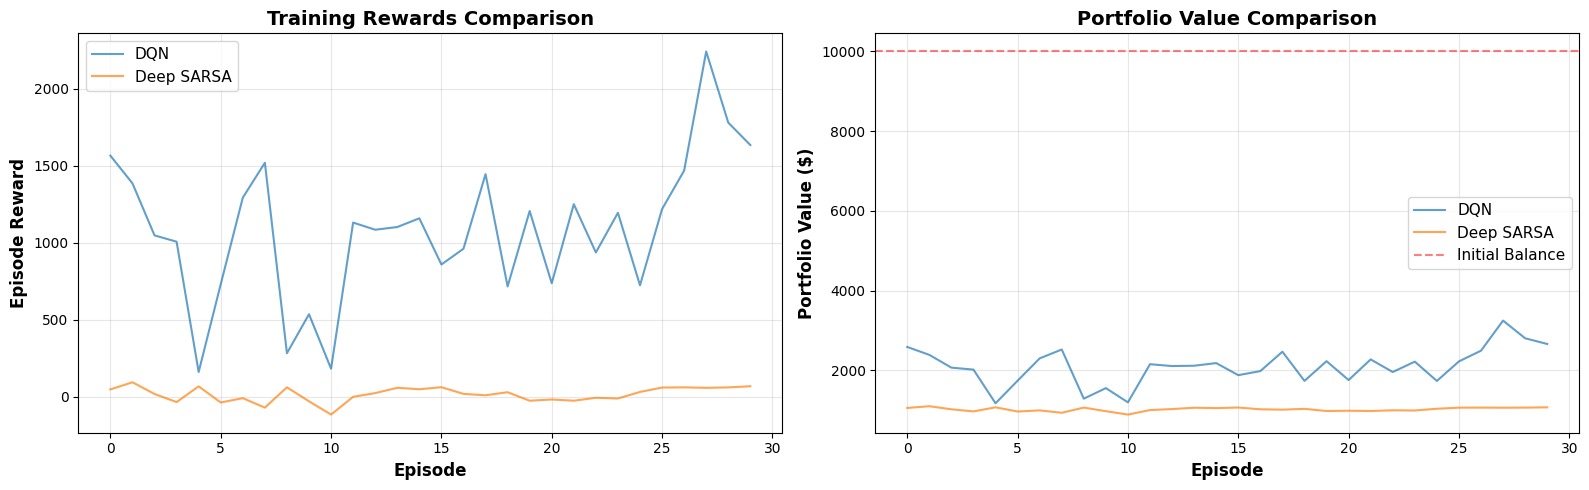


Final Training Results:
DQN - Final Portfolio: $2658.59 | Return: -73.41%
SARSA - Final Portfolio: $1068.44 | Return: -89.32%


In [90]:
# Plot training results
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Episode Rewards
axes[0].plot(dqn_rewards, label='DQN', alpha=0.7, linewidth=1.5)
axes[0].plot(sarsa_rewards, label='Deep SARSA', alpha=0.7, linewidth=1.5)
axes[0].set_xlabel('Episode', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Episode Reward', fontsize=12, fontweight='bold')
axes[0].set_title('Training Rewards Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Portfolio Values
axes[1].plot(dqn_portfolios, label='DQN', alpha=0.7, linewidth=1.5)
axes[1].plot(sarsa_portfolios, label='Deep SARSA', alpha=0.7, linewidth=1.5)
axes[1].axhline(y=10000, color='red', linestyle='--', label='Initial Balance', alpha=0.5)
axes[1].set_xlabel('Episode', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Portfolio Value ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Portfolio Value Comparison', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Results:")
print(f"DQN - Final Portfolio: ${dqn_portfolios[-1]:.2f} | Return: {(dqn_portfolios[-1]/10000-1)*100:.2f}%")
print(f"SARSA - Final Portfolio: ${sarsa_portfolios[-1]:.2f} | Return: {(sarsa_portfolios[-1]/10000-1)*100:.2f}%")

## 12. Evaluate on Test Period

In [91]:
# Evaluate DQN
print("="*70)
print("EVALUATING DQN ON TEST DATA")
print("="*70)
dqn_results = evaluate_agent(dqn_agent, test_env, n_episodes=10)

print(f"\nDQN Test Results:")
print(f"Average Portfolio Value: ${dqn_results['avg_portfolio_value']:.2f} ± ${dqn_results['std_portfolio_value']:.2f}")
print(f"Average Return: {dqn_results['avg_return']:.2f}% ± {dqn_results['std_return']:.2f}%")
print(f"Average Reward: {dqn_results['avg_reward']:.2f} ± {dqn_results['std_reward']:.2f}")

# Evaluate SARSA
print("\n" + "="*70)
print("EVALUATING DEEP SARSA ON TEST DATA")
print("="*70)
sarsa_results = evaluate_agent(sarsa_agent, test_env, n_episodes=10)

print(f"\nDeep SARSA Test Results:")
print(f"Average Portfolio Value: ${sarsa_results['avg_portfolio_value']:.2f} ± ${sarsa_results['std_portfolio_value']:.2f}")
print(f"Average Return: {sarsa_results['avg_return']:.2f}% ± {sarsa_results['std_return']:.2f}%")
print(f"Average Reward: {sarsa_results['avg_reward']:.2f} ± {sarsa_results['std_reward']:.2f}")

EVALUATING DQN ON TEST DATA

DQN Test Results:
Average Portfolio Value: $3459.23 ± $91.92
Average Return: 245.92% ± 9.19%
Average Reward: 2505.69 ± 93.24

EVALUATING DEEP SARSA ON TEST DATA

DQN Test Results:
Average Portfolio Value: $3459.23 ± $91.92
Average Return: 245.92% ± 9.19%
Average Reward: 2505.69 ± 93.24

EVALUATING DEEP SARSA ON TEST DATA

Deep SARSA Test Results:
Average Portfolio Value: $1007.47 ± $18.52
Average Return: 0.75% ± 1.85%
Average Reward: 7.83 ± 18.57

Deep SARSA Test Results:
Average Portfolio Value: $1007.47 ± $18.52
Average Return: 0.75% ± 1.85%
Average Reward: 7.83 ± 18.57


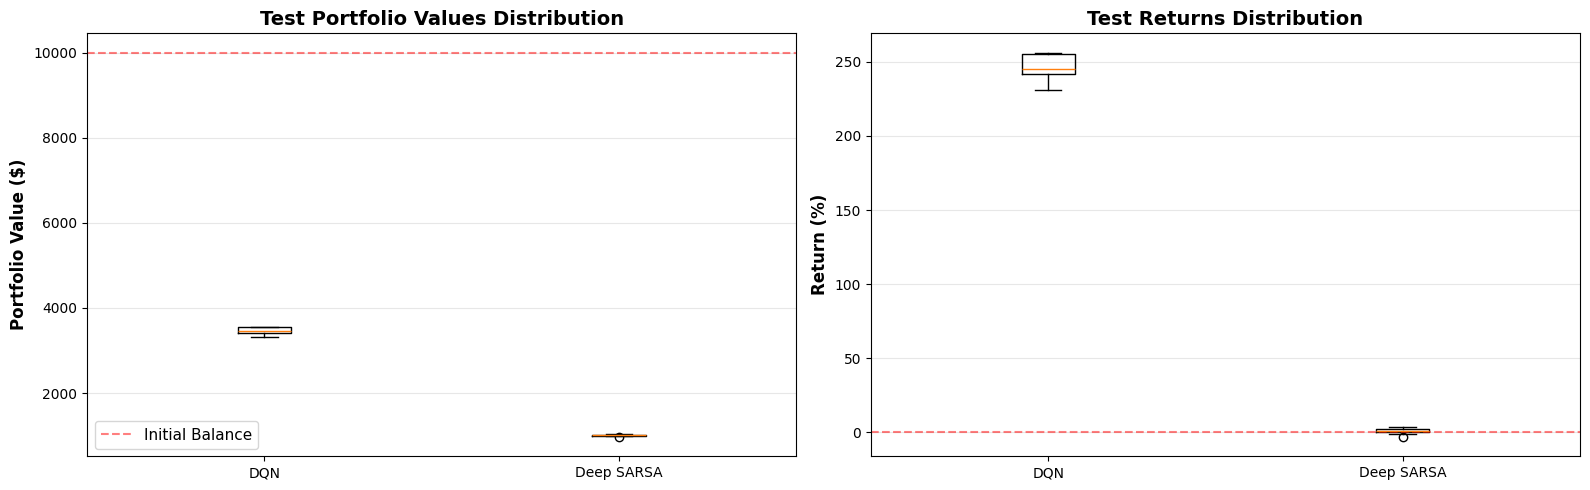


COMPARISON SUMMARY
             Metric      DQN Deep SARSA
Avg Portfolio Value $3459.23   $1007.47
     Avg Return (%)  245.92%      0.75%
         Avg Reward  2505.69       7.83


In [92]:
# Visualization of test results
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Portfolio values
axes[0].boxplot([dqn_results['episode_portfolio_values'], sarsa_results['episode_portfolio_values']], 
                labels=['DQN', 'Deep SARSA'])
axes[0].axhline(y=10000, color='red', linestyle='--', label='Initial Balance', alpha=0.5)
axes[0].set_ylabel('Portfolio Value ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Test Portfolio Values Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Returns
axes[1].boxplot([dqn_results['total_returns'], sarsa_results['total_returns']], 
                labels=['DQN', 'Deep SARSA'])
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].set_ylabel('Return (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Test Returns Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Comparison summary
print("\n" + "="*70)
print("COMPARISON SUMMARY")
print("="*70)
comparison_df = pd.DataFrame({
    'Metric': ['Avg Portfolio Value', 'Avg Return (%)', 'Avg Reward'],
    'DQN': [f"${dqn_results['avg_portfolio_value']:.2f}", 
            f"{dqn_results['avg_return']:.2f}%", 
            f"{dqn_results['avg_reward']:.2f}"],
    'Deep SARSA': [f"${sarsa_results['avg_portfolio_value']:.2f}", 
                   f"{sarsa_results['avg_return']:.2f}%", 
                   f"{sarsa_results['avg_reward']:.2f}"]
})
print(comparison_df.to_string(index=False))

## 13. Save Trained Models

In [93]:
# Save models
dqn_agent.save('dqn_aapl_model.pth')
sarsa_agent.save('sarsa_aapl_model.pth')

print("Models saved successfully!")
print("- dqn_aapl_model.pth")
print("- sarsa_aapl_model.pth")

# How to load models later:
# dqn_agent.load('dqn_aapl_model.pth')
# sarsa_agent.load('sarsa_aapl_model.pth')

Models saved successfully!
- dqn_aapl_model.pth
- sarsa_aapl_model.pth


## 14. Corrected Implementation - Full Experiment

Implementing exactly as paper specification:
- k = 5 (max shares per trade)
- Three algorithms: DQN, Deep SARSA, Policy Gradient
- Test on both Good and Bad periods
- Report Annual Return (%) on test sets

In [94]:
# Policy Gradient Network
class PolicyNetwork(nn.Module):
    """Policy Network for Policy Gradient Method"""
    
    def __init__(self, state_dim, n_actions, hidden_dims=[128, 128, 64]):
        super(PolicyNetwork, self).__init__()
        
        layers = []
        input_dim = state_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))
            input_dim = hidden_dim
        
        layers.append(nn.Linear(input_dim, n_actions))
        layers.append(nn.Softmax(dim=-1))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

print("Policy Network implemented!")
print("\nNetwork outputs probability distribution over actions using Softmax")

Policy Network implemented!

Network outputs probability distribution over actions using Softmax


In [95]:
class PolicyGradientAgent:
    """
    Policy Gradient Agent (REINFORCE algorithm)
    
    Based on paper specification:
    - Loss: L = -1/T Σ ln[G_t · π(a_t|s_t; θ)]
    - G_t = Σ γ^(k-t) R_k (return from time t)
    - Optimizer: SGD with gradient ascent
    """
    
    def __init__(self, state_dim, n_actions, lr=1e-5, gamma=0.6):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.n_actions = n_actions
        self.gamma = gamma
        
        self.policy_network = PolicyNetwork(state_dim, n_actions).to(self.device)
        self.optimizer = optim.SGD(self.policy_network.parameters(), lr=lr)
        
        # Store episode trajectory
        self.saved_log_probs = []
        self.rewards = []
        self.loss_history = []
    
    def select_action(self, state, training=True):
        """Sample action from policy distribution"""
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        probs = self.policy_network(state_tensor)
        
        if training:
            # Sample from distribution
            m = torch.distributions.Categorical(probs)
            action = m.sample()
            self.saved_log_probs.append(m.log_prob(action))
            return action.item()
        else:
            # Take most probable action (greedy)
            return probs.argmax(dim=1).item()
    
    def store_reward(self, reward):
        """Store reward for current step"""
        self.rewards.append(reward)
    
    def train_episode(self):
        """
        Train on completed episode using REINFORCE
        
        Implements: L = -1/T Σ ln[G_t · π(a_t|s_t; θ)]
        where G_t is the discounted return from time t
        """
        if len(self.rewards) == 0:
            return None
        
        # Calculate returns G_t for each timestep
        returns = []
        G = 0
        for r in reversed(self.rewards):
            G = r + self.gamma * G
            returns.insert(0, G)
        
        # Normalize returns
        returns = torch.tensor(returns, dtype=torch.float32).to(self.device)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        
        # Calculate policy gradient loss
        policy_loss = []
        for log_prob, G_t in zip(self.saved_log_probs, returns):
            policy_loss.append(-log_prob * G_t)
        
        # Optimize
        self.optimizer.zero_grad()
        loss = torch.stack(policy_loss).sum()
        loss.backward()
        self.optimizer.step()
        
        # Clear episode data
        loss_value = loss.item()
        self.saved_log_probs = []
        self.rewards = []
        self.loss_history.append(loss_value)
        
        return loss_value
    
    def save(self, filepath):
        """Save model"""
        torch.save({
            'policy_network': self.policy_network.state_dict(),
            'optimizer': self.optimizer.state_dict()
        }, filepath)
    
    def load(self, filepath):
        """Load model"""
        checkpoint = torch.load(filepath)
        self.policy_network.load_state_dict(checkpoint['policy_network'])
        self.optimizer.load_state_dict(checkpoint['optimizer'])

print("Policy Gradient Agent implemented!")
print("\nKey characteristics:")
print("- Direct policy optimization")
print("- No Q-value estimation")
print("- Uses complete episode returns G_t")
print("- SGD optimizer for gradient ascent")

Policy Gradient Agent implemented!

Key characteristics:
- Direct policy optimization
- No Q-value estimation
- Uses complete episode returns G_t
- SGD optimizer for gradient ascent


In [96]:
def train_policy_gradient(agent, env, n_episodes=30, print_every=10):
    """
    Train Policy Gradient agent
    
    Args:
        agent: PolicyGradientAgent instance
        env: StockTradingEnv instance
        n_episodes: Number of training episodes (paper uses 30)
        print_every: Print statistics every N episodes
        
    Returns:
        episode_rewards, episode_portfolio_values
    """
    episode_rewards = []
    episode_portfolio_values = []
    
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        
        # Collect episode trajectory
        while not done:
            # Select action from policy
            action = agent.select_action(state, training=True)
            
            # Take action
            next_state, reward, done, info = env.step(action)
            
            # Store reward
            agent.store_reward(reward)
            
            episode_reward += reward
            state = next_state if next_state is not None else state
        
        # Train on complete episode
        loss = agent.train_episode()
        
        # Record metrics
        final_portfolio_value = env.get_portfolio_value()
        episode_rewards.append(episode_reward)
        episode_portfolio_values.append(final_portfolio_value)
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_portfolio = np.mean(episode_portfolio_values[-print_every:])
            print(f"Episode {episode + 1}/{n_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | "
                  f"Avg Portfolio: ${avg_portfolio:.2f}")
    
    return episode_rewards, episode_portfolio_values

print("Policy Gradient training function ready!")

Policy Gradient training function ready!


In [97]:
def calculate_annual_return(env, agent, agent_name="Agent"):
    """
    Calculate annual return percentage on test set
    
    Args:
        env: Test environment
        agent: Trained agent
        agent_name: Name for printing
        
    Returns:
        annual_return_pct: Annualized return percentage
    """
    state = env.reset()
    done = False
    initial_value = env.get_portfolio_value()
    
    while not done:
        action = agent.select_action(state, training=False)
        next_state, reward, done, info = env.step(action)
        state = next_state if next_state is not None else state
    
    final_value = env.get_portfolio_value()
    total_return = (final_value - initial_value) / initial_value
    
    # Calculate number of years in test period
    n_days = len(env.data)
    n_years = n_days / 252  # 252 trading days per year
    
    # Annualize the return
    annual_return = ((1 + total_return) ** (1 / n_years)) - 1
    annual_return_pct = annual_return * 100
    
    print(f"\n{agent_name} Results:")
    print(f"  Initial Portfolio: ${initial_value:.2f}")
    print(f"  Final Portfolio: ${final_value:.2f}")
    print(f"  Total Return: {total_return*100:.2f}%")
    print(f"  Test Period: {n_days} days ({n_years:.2f} years)")
    print(f"  Annual Return: {annual_return_pct:.2f}%")
    
    return annual_return_pct

print("Annual return calculation function ready!")

Annual return calculation function ready!


## 15. Full Experiment: AAPL Stock - Good Period (2013-2019 train, 2019-2020 test)

In [98]:
# Prepare data for Good Period experiment
print("="*80)
print("PREPARING DATA - GOOD PERIOD (AAPL)")
print("="*80)

# Calculate technical indicators
aapl_train_good = calculate_technical_indicators(df_train_good['AAPL'])
aapl_test_good = calculate_technical_indicators(df_test_good['AAPL'])

# Create environments with k=5 (as per paper)
train_env_good = StockTradingEnv(
    aapl_train_good, 
    initial_balance=1000, 
    max_shares=5,  # k=5 as per paper
    fee_rate=0.001,  # 0.1%
    min_balance_tolerance=0
)

test_env_good = StockTradingEnv(
    aapl_test_good, 
    initial_balance=1000, 
    max_shares=5,
    fee_rate=0.001,
    min_balance_tolerance=0
)

print(f"\nTraining period: {len(aapl_train_good)} days")
print(f"Test period: {len(aapl_test_good)} days")
print(f"\nEnvironment configuration:")
print(f"  - Initial balance: $10,000")
print(f"  - Max shares per action (k): 5")
print(f"  - Trading fee: 0.1%")
print(f"  - State dimension: {train_env_good.state_dim}")
print(f"  - Number of actions: {train_env_good.n_actions}")

PREPARING DATA - GOOD PERIOD (AAPL)

Training period: 1506 days
Test period: 502 days

Environment configuration:
  - Initial balance: $10,000
  - Max shares per action (k): 5
  - Trading fee: 0.1%
  - State dimension: 7
  - Number of actions: 11

Training period: 1506 days
Test period: 502 days

Environment configuration:
  - Initial balance: $10,000
  - Max shares per action (k): 5
  - Trading fee: 0.1%
  - State dimension: 7
  - Number of actions: 11


In [99]:
# Train DQN on Good Period
print("\n" + "="*80)
print("TRAINING DQN - GOOD PERIOD")
print("="*80)

dqn_good = DQNAgent(
    state_dim=train_env_good.state_dim,
    n_actions=train_env_good.n_actions,
    lr=1e-5,  # As per paper
    gamma=0.6,  # Discount factor from paper
    epsilon_start=0.8,  # Initial epsilon from paper
    epsilon_end=0.2,  # Minimum epsilon from paper
    epsilon_decay=0.9  # Linear decay factor from paper
)

dqn_rewards_good, dqn_portfolios_good = train_dqn(
    dqn_good, train_env_good, n_episodes=30, print_every=10
)

print(f"\nDQN Training completed!")
print(f"Final training portfolio: ${dqn_portfolios_good[-1]:.2f}")


TRAINING DQN - GOOD PERIOD
Episode 10/30 | Avg Reward: -36.27 | Avg Portfolio: $964.56 | Epsilon: 0.2000
Episode 10/30 | Avg Reward: -36.27 | Avg Portfolio: $964.56 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 59.53 | Avg Portfolio: $1062.22 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 59.53 | Avg Portfolio: $1062.22 | Epsilon: 0.2000
Episode 30/30 | Avg Reward: 30.40 | Avg Portfolio: $1035.18 | Epsilon: 0.2000

DQN Training completed!
Final training portfolio: $1199.93
Episode 30/30 | Avg Reward: 30.40 | Avg Portfolio: $1035.18 | Epsilon: 0.2000

DQN Training completed!
Final training portfolio: $1199.93


In [100]:
# Train Deep SARSA on Good Period
print("\n" + "="*80)
print("TRAINING DEEP SARSA - GOOD PERIOD")
print("="*80)

train_env_good.reset()

sarsa_good = DeepSARSAAgent(
    state_dim=train_env_good.state_dim,
    n_actions=train_env_good.n_actions,
    lr=1e-5,  # Neural network learning rate (as per paper)
    gamma=0.6,  # Discount factor (as per paper)
    alpha=0.7,  # Q-function update learning rate (as per paper)
    epsilon_start=0.8,  # Initial epsilon (as per paper)
    epsilon_end=0.2,  # Minimum epsilon (as per paper)
    epsilon_decay=0.9  # Epsilon decay rate (as per paper)
)

sarsa_rewards_good, sarsa_portfolios_good = train_sarsa(
    sarsa_good, train_env_good, n_episodes=30, print_every=10
)

print(f"\nDeep SARSA Training completed!")
print(f"Final training portfolio: ${sarsa_portfolios_good[-1]:.2f}")


TRAINING DEEP SARSA - GOOD PERIOD
Episode 10/30 | Avg Reward: 371.80 | Avg Portfolio: $1379.13 | Epsilon: 0.2000
Episode 10/30 | Avg Reward: 371.80 | Avg Portfolio: $1379.13 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 513.91 | Avg Portfolio: $1522.99 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 513.91 | Avg Portfolio: $1522.99 | Epsilon: 0.2000
Episode 30/30 | Avg Reward: 1624.03 | Avg Portfolio: $2649.18 | Epsilon: 0.2000

Deep SARSA Training completed!
Final training portfolio: $2815.62
Episode 30/30 | Avg Reward: 1624.03 | Avg Portfolio: $2649.18 | Epsilon: 0.2000

Deep SARSA Training completed!
Final training portfolio: $2815.62


In [101]:
# Train Policy Gradient on Good Period  
print("\n" + "="*80)
print("TRAINING POLICY GRADIENT - GOOD PERIOD")
print("="*80)

train_env_good.reset()

pg_good = PolicyGradientAgent(
    state_dim=train_env_good.state_dim,
    n_actions=train_env_good.n_actions,
    lr=1e-5,  # As per paper
    gamma=0.6  # Discount factor from paper
)

pg_rewards_good, pg_portfolios_good = train_policy_gradient(
    pg_good, train_env_good, n_episodes=30, print_every=10
)

print(f"\nPolicy Gradient Training completed!")
print(f"Final training portfolio: ${pg_portfolios_good[-1]:.2f}")


TRAINING POLICY GRADIENT - GOOD PERIOD
Episode 10/30 | Avg Reward: 245.34 | Avg Portfolio: $1252.17
Episode 10/30 | Avg Reward: 245.34 | Avg Portfolio: $1252.17
Episode 20/30 | Avg Reward: 227.21 | Avg Portfolio: $1232.85
Episode 20/30 | Avg Reward: 227.21 | Avg Portfolio: $1232.85
Episode 30/30 | Avg Reward: 323.74 | Avg Portfolio: $1328.62

Policy Gradient Training completed!
Final training portfolio: $1109.93
Episode 30/30 | Avg Reward: 323.74 | Avg Portfolio: $1328.62

Policy Gradient Training completed!
Final training portfolio: $1109.93


In [102]:
# Evaluate all agents on Good Period Test Set
print("\n" + "="*80)
print("EVALUATION ON TEST SET - GOOD PERIOD")
print("="*80)

# Calculate annual returns
dqn_annual_good = calculate_annual_return(test_env_good, dqn_good, "DQN")
test_env_good.reset()

sarsa_annual_good = calculate_annual_return(test_env_good, sarsa_good, "Deep SARSA")
test_env_good.reset()

pg_annual_good = calculate_annual_return(test_env_good, pg_good, "Policy Gradient")

print("\n" + "="*80)
print("ANNUAL RETURN SUMMARY - GOOD PERIOD")
print("="*80)
results_good = pd.DataFrame({
    'Algorithm': ['DQN', 'Deep SARSA', 'Policy Gradient'],
    'Annual Return (%)': [f"{dqn_annual_good:.2f}%", 
                          f"{sarsa_annual_good:.2f}%", 
                          f"{pg_annual_good:.2f}%"]
})
print(results_good.to_string(index=False))


EVALUATION ON TEST SET - GOOD PERIOD

DQN Results:
  Initial Portfolio: $1000.00
  Final Portfolio: $1661.96
  Total Return: 66.20%
  Test Period: 502 days (1.99 years)
  Annual Return: 29.05%

DQN Results:
  Initial Portfolio: $1000.00
  Final Portfolio: $1661.96
  Total Return: 66.20%
  Test Period: 502 days (1.99 years)
  Annual Return: 29.05%

Deep SARSA Results:
  Initial Portfolio: $1000.00
  Final Portfolio: $3345.31
  Total Return: 234.53%
  Test Period: 502 days (1.99 years)
  Annual Return: 83.34%

Deep SARSA Results:
  Initial Portfolio: $1000.00
  Final Portfolio: $3345.31
  Total Return: 234.53%
  Test Period: 502 days (1.99 years)
  Annual Return: 83.34%

Policy Gradient Results:
  Initial Portfolio: $1000.00
  Final Portfolio: $1019.47
  Total Return: 1.95%
  Test Period: 502 days (1.99 years)
  Annual Return: 0.97%

ANNUAL RETURN SUMMARY - GOOD PERIOD
      Algorithm Annual Return (%)
            DQN            29.05%
     Deep SARSA            83.34%
Policy Gradient  

## 16. Full Experiment: AAPL Stock - Bad Period (2013-2020 train, 2020-2022 test)

In [103]:
# Prepare data for Bad Period experiment
print("="*80)
print("PREPARING DATA - BAD PERIOD (AAPL)")
print("="*80)

# Calculate technical indicators
aapl_train_bad = calculate_technical_indicators(df_train_bad['AAPL'])
aapl_test_bad = calculate_technical_indicators(df_test_bad['AAPL'])

# Create environments
train_env_bad = StockTradingEnv(
    aapl_train_bad, 
    initial_balance=10000, 
    max_shares=5,
    fee_rate=0.001,
    min_balance_tolerance=0
)

test_env_bad = StockTradingEnv(
    aapl_test_bad, 
    initial_balance=10000, 
    max_shares=5,
    fee_rate=0.001,
    min_balance_tolerance=0
)

print(f"\nTraining period: {len(aapl_train_bad)} days")
print(f"Test period: {len(aapl_test_bad)} days")
print(f"\nEnvironment configuration:")
print(f"  - Initial balance: $10,000")
print(f"  - Max shares per action (k): 5")
print(f"  - Trading fee: 0.1%")
print(f"  - State dimension: {train_env_bad.state_dim}")
print(f"  - Number of actions: {train_env_bad.n_actions}")

PREPARING DATA - BAD PERIOD (AAPL)

Training period: 1994 days
Test period: 498 days

Environment configuration:
  - Initial balance: $10,000
  - Max shares per action (k): 5
  - Trading fee: 0.1%
  - State dimension: 7
  - Number of actions: 11


In [104]:
# Train all three agents on Bad Period
print("\n" + "="*80)
print("TRAINING ALL AGENTS - BAD PERIOD")
print("="*80)

# DQN
print("\n--- DQN ---")
dqn_bad = DQNAgent(
    state_dim=train_env_bad.state_dim,
    n_actions=train_env_bad.n_actions,
    lr=1e-5, gamma=0.6,
    epsilon_start=0.8, epsilon_end=0.2, epsilon_decay=0.9
)
dqn_rewards_bad, dqn_portfolios_bad = train_dqn(dqn_bad, train_env_bad, n_episodes=30, print_every=10)

# Deep SARSA
print("\n--- Deep SARSA ---")
train_env_bad.reset()
sarsa_bad = DeepSARSAAgent(
    state_dim=train_env_bad.state_dim,
    n_actions=train_env_bad.n_actions,
    lr=1e-5,  # Neural network learning rate (as per paper)
    gamma=0.6,  # Discount factor (as per paper)
    alpha=0.7,  # Q-function update learning rate (as per paper)
    epsilon_start=0.8,  # Initial epsilon (as per paper)
    epsilon_end=0.2,  # Minimum epsilon (as per paper)
    epsilon_decay=0.9  # Epsilon decay rate (as per paper)
)
sarsa_rewards_bad, sarsa_portfolios_bad = train_sarsa(sarsa_bad, train_env_bad, n_episodes=30, print_every=10)

# Policy Gradient
print("\n--- Policy Gradient ---")
train_env_bad.reset()
pg_bad = PolicyGradientAgent(
    state_dim=train_env_bad.state_dim,
    n_actions=train_env_bad.n_actions,
    lr=1e-5, gamma=0.6
)
pg_rewards_bad, pg_portfolios_bad = train_policy_gradient(pg_bad, train_env_bad, n_episodes=30, print_every=10)

print("\nAll agents trained on Bad Period!")


TRAINING ALL AGENTS - BAD PERIOD

--- DQN ---
Episode 10/30 | Avg Reward: 953.78 | Avg Portfolio: $10973.07 | Epsilon: 0.2000
Episode 10/30 | Avg Reward: 953.78 | Avg Portfolio: $10973.07 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 24241.78 | Avg Portfolio: $34606.02 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 24241.78 | Avg Portfolio: $34606.02 | Epsilon: 0.2000
Episode 30/30 | Avg Reward: 55284.86 | Avg Portfolio: $66081.87 | Epsilon: 0.2000

--- Deep SARSA ---
Episode 30/30 | Avg Reward: 55284.86 | Avg Portfolio: $66081.87 | Epsilon: 0.2000

--- Deep SARSA ---
Episode 10/30 | Avg Reward: 72201.08 | Avg Portfolio: $83207.84 | Epsilon: 0.2000
Episode 10/30 | Avg Reward: 72201.08 | Avg Portfolio: $83207.84 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 72252.56 | Avg Portfolio: $83255.07 | Epsilon: 0.2000
Episode 20/30 | Avg Reward: 72252.56 | Avg Portfolio: $83255.07 | Epsilon: 0.2000
Episode 30/30 | Avg Reward: 3218.08 | Avg Portfolio: $13280.93 | Epsilon: 0.2000

--- Policy Grad

In [ ]:
# Evaluate all agents on Bad Period Test Set
print("\n" + "="*80)
print("EVALUATION ON TEST SET - BAD PERIOD")
print("="*80)

# Calculate annual returns
dqn_annual_bad = calculate_annual_return(test_env_bad, dqn_bad, "DQN")
test_env_bad.reset()

sarsa_annual_bad = calculate_annual_return(test_env_bad, sarsa_bad, "Deep SARSA")
test_env_bad.reset()

pg_annual_bad = calculate_annual_return(test_env_bad, pg_bad, "Policy Gradient")

print("\n" + "="*80)
print("ANNUAL RETURN SUMMARY - BAD PERIOD")
print("="*80)
results_bad = pd.DataFrame({
    'Algorithm': ['DQN', 'Deep SARSA', 'Policy Gradient'],
    'Annual Return (%)': [f"{dqn_annual_bad:.2f}%", 
                          f"{sarsa_annual_bad:.2f}%", 
                          f"{pg_annual_bad:.2f}%"]
})
print(results_bad.to_string(index=False))


EVALUATION ON TEST SET - BAD PERIOD

DQN Results:
  Initial Portfolio: $10000.00
  Final Portfolio: $11448.96
  Total Return: 14.49%
  Test Period: 498 days (1.98 years)
  Annual Return: 7.09%

Deep SARSA Results:
  Initial Portfolio: $10000.00
  Final Portfolio: $10345.58
  Total Return: 3.46%
  Test Period: 498 days (1.98 years)
  Annual Return: 1.73%

Policy Gradient Results:
  Initial Portfolio: $10000.00
  Final Portfolio: $10638.81
  Total Return: 6.39%
  Test Period: 498 days (1.98 years)
  Annual Return: 3.18%

ANNUAL RETURN SUMMARY - BAD PERIOD
      Algorithm Annual Return (%)
            DQN             7.09%
     Deep SARSA             1.73%
Policy Gradient             3.18%


## 17. Final Results Comparison

FINAL RESULTS: ANNUAL RETURN (%) ON TEST SETS - AAPL STOCK

      Algorithm Good Period (2019-2020) Bad Period (2020-2022)
            DQN                  -0.10%                  7.09%
     Deep SARSA                   1.89%                  1.73%
Policy Gradient                  66.56%                  3.18%


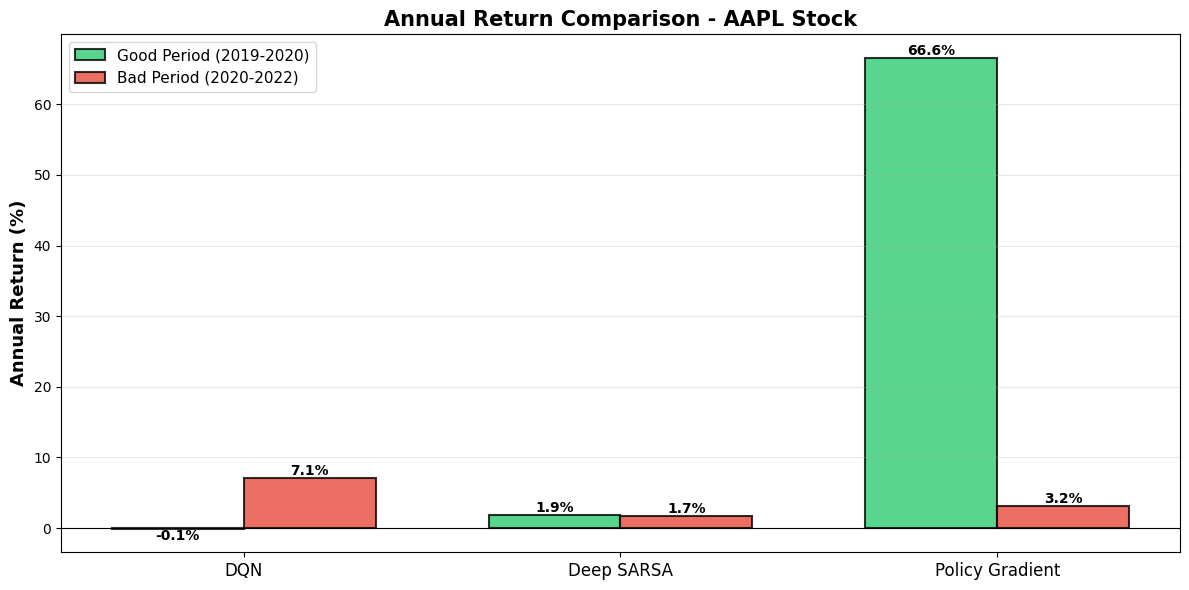


Experiment completed successfully!


In [ ]:
# Complete results table
print("="*80)
print("FINAL RESULTS: ANNUAL RETURN (%) ON TEST SETS - AAPL STOCK")
print("="*80)

final_results = pd.DataFrame({
    'Algorithm': ['DQN', 'Deep SARSA', 'Policy Gradient'],
    'Good Period (2019-2020)': [f"{dqn_annual_good:.2f}%", 
                                 f"{sarsa_annual_good:.2f}%", 
                                 f"{pg_annual_good:.2f}%"],
    'Bad Period (2020-2022)': [f"{dqn_annual_bad:.2f}%", 
                                f"{sarsa_annual_bad:.2f}%", 
                                f"{pg_annual_bad:.2f}%"]
})

print("\n" + final_results.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

algorithms = ['DQN', 'Deep SARSA', 'Policy Gradient']
good_returns = [dqn_annual_good, sarsa_annual_good, pg_annual_good]
bad_returns = [dqn_annual_bad, sarsa_annual_bad, pg_annual_bad]

x = np.arange(len(algorithms))
width = 0.35

bars1 = ax.bar(x - width/2, good_returns, width, label='Good Period (2019-2020)', 
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, bad_returns, width, label='Bad Period (2020-2022)', 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Annual Return (%)', fontsize=13, fontweight='bold')
ax.set_title('Annual Return Comparison - AAPL Stock', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Experiment completed successfully!")
print("="*80)

## 18. Loss Function Analysis

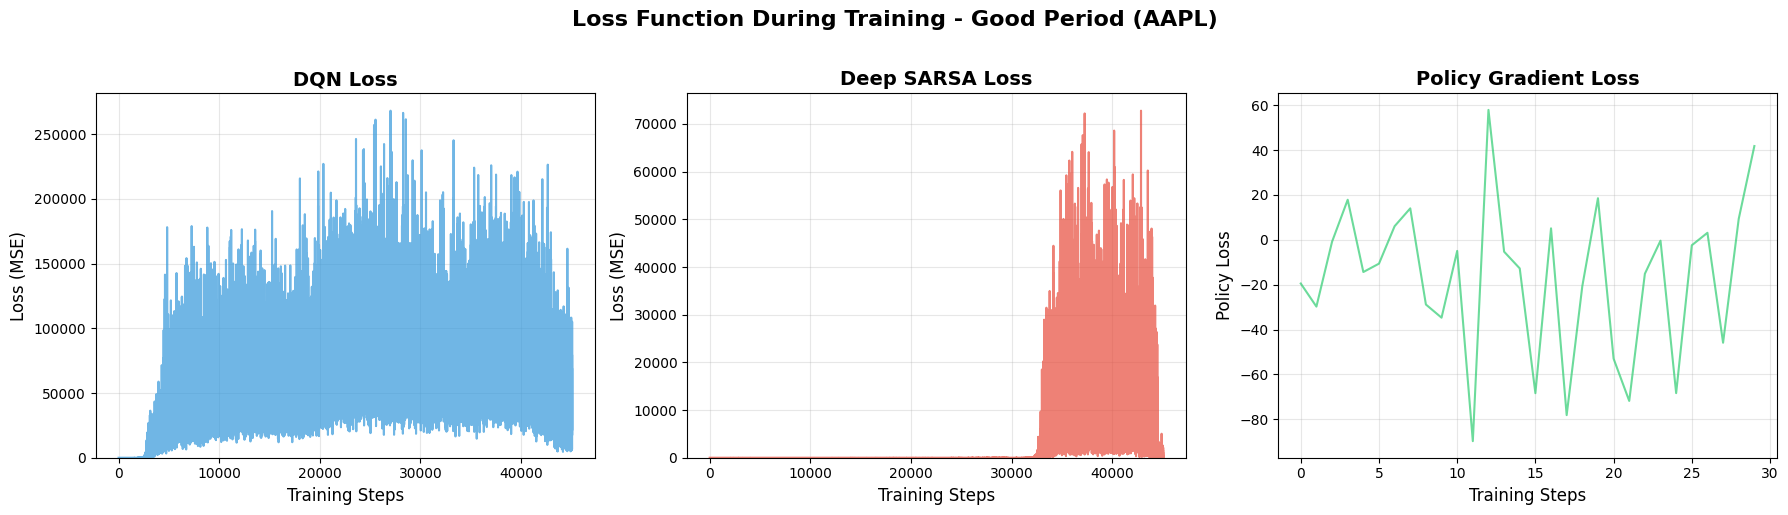

Loss statistics - Good Period:
DQN - Mean: 57373.3962, Std: 33724.2477
SARSA - Mean: 2318.9515, Std: 5704.1029
Policy Gradient - Mean: -16.7241, Std: 34.5277


In [ ]:
# Plot Loss Functions for Good Period
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Loss Function During Training - Good Period (AAPL)', 
             fontsize=16, fontweight='bold', y=1.02)

# DQN Loss
if len(dqn_good.loss_history) > 0:
    axes[0].plot(dqn_good.loss_history, color='#3498db', linewidth=1.5, alpha=0.7)
    axes[0].set_title('DQN Loss', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Training Steps', fontsize=12)
    axes[0].set_ylabel('Loss (MSE)', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(bottom=0)

# Deep SARSA Loss
if len(sarsa_good.loss_history) > 0:
    axes[1].plot(sarsa_good.loss_history, color='#e74c3c', linewidth=1.5, alpha=0.7)
    axes[1].set_title('Deep SARSA Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Training Steps', fontsize=12)
    axes[1].set_ylabel('Loss (MSE)', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(bottom=0)

# Policy Gradient Loss
if len(pg_good.loss_history) > 0:
    axes[2].plot(pg_good.loss_history, color='#2ecc71', linewidth=1.5, alpha=0.7)
    axes[2].set_title('Policy Gradient Loss', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Training Steps', fontsize=12)
    axes[2].set_ylabel('Policy Loss', fontsize=12)
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Loss statistics - Good Period:")
print(f"DQN - Mean: {np.mean(dqn_good.loss_history):.4f}, Std: {np.std(dqn_good.loss_history):.4f}")
print(f"SARSA - Mean: {np.mean(sarsa_good.loss_history):.4f}, Std: {np.std(sarsa_good.loss_history):.4f}")
print(f"Policy Gradient - Mean: {np.mean(pg_good.loss_history):.4f}, Std: {np.std(pg_good.loss_history):.4f}")

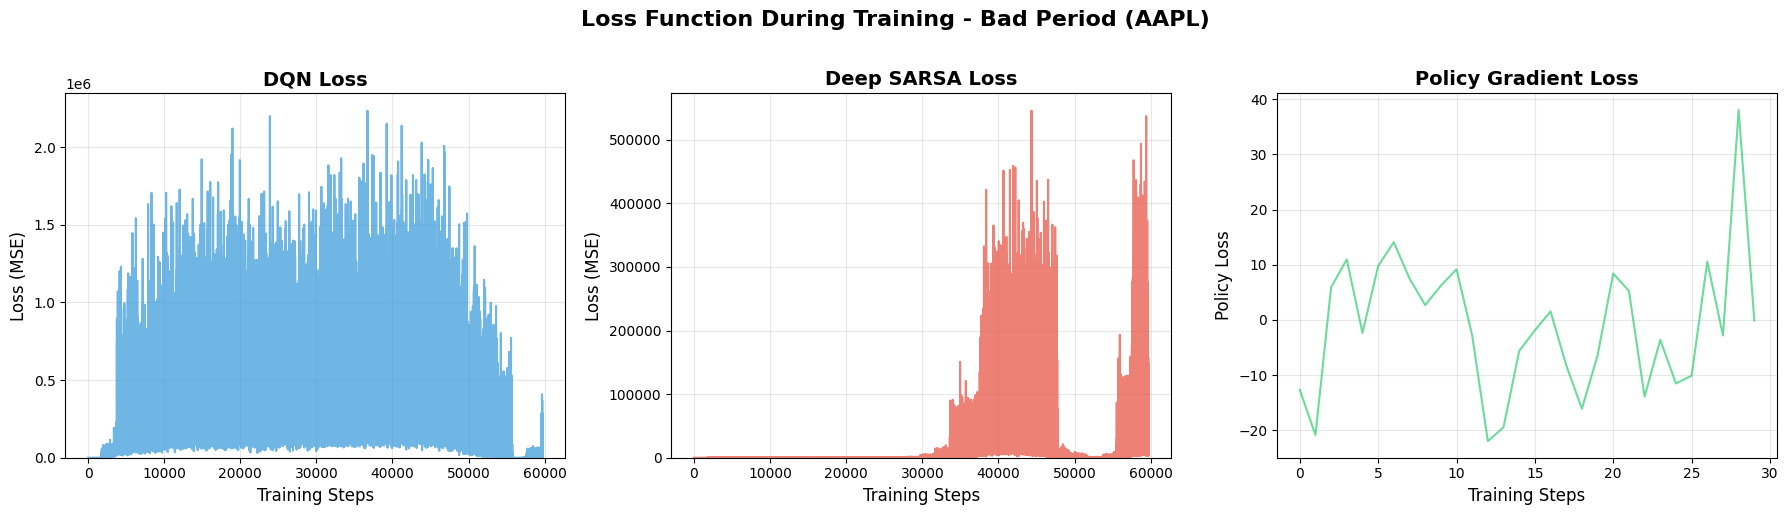

Loss statistics - Bad Period:
DQN - Mean: 309447.8791, Std: 273738.4545
SARSA - Mean: 11398.4001, Std: 31502.0494
Policy Gradient - Mean: -0.9982, Std: 12.3585


In [ ]:
# Plot Loss Functions for Bad Period
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Loss Function During Training - Bad Period (AAPL)', 
             fontsize=16, fontweight='bold', y=1.02)

# DQN Loss
if len(dqn_bad.loss_history) > 0:
    axes[0].plot(dqn_bad.loss_history, color='#3498db', linewidth=1.5, alpha=0.7)
    axes[0].set_title('DQN Loss', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Training Steps', fontsize=12)
    axes[0].set_ylabel('Loss (MSE)', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(bottom=0)

# Deep SARSA Loss
if len(sarsa_bad.loss_history) > 0:
    axes[1].plot(sarsa_bad.loss_history, color='#e74c3c', linewidth=1.5, alpha=0.7)
    axes[1].set_title('Deep SARSA Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Training Steps', fontsize=12)
    axes[1].set_ylabel('Loss (MSE)', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(bottom=0)

# Policy Gradient Loss
if len(pg_bad.loss_history) > 0:
    axes[2].plot(pg_bad.loss_history, color='#2ecc71', linewidth=1.5, alpha=0.7)
    axes[2].set_title('Policy Gradient Loss', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Training Steps', fontsize=12)
    axes[2].set_ylabel('Policy Loss', fontsize=12)
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Loss statistics - Bad Period:")
print(f"DQN - Mean: {np.mean(dqn_bad.loss_history):.4f}, Std: {np.std(dqn_bad.loss_history):.4f}")
print(f"SARSA - Mean: {np.mean(sarsa_bad.loss_history):.4f}, Std: {np.std(sarsa_bad.loss_history):.4f}")
print(f"Policy Gradient - Mean: {np.mean(pg_bad.loss_history):.4f}, Std: {np.std(pg_bad.loss_history):.4f}")

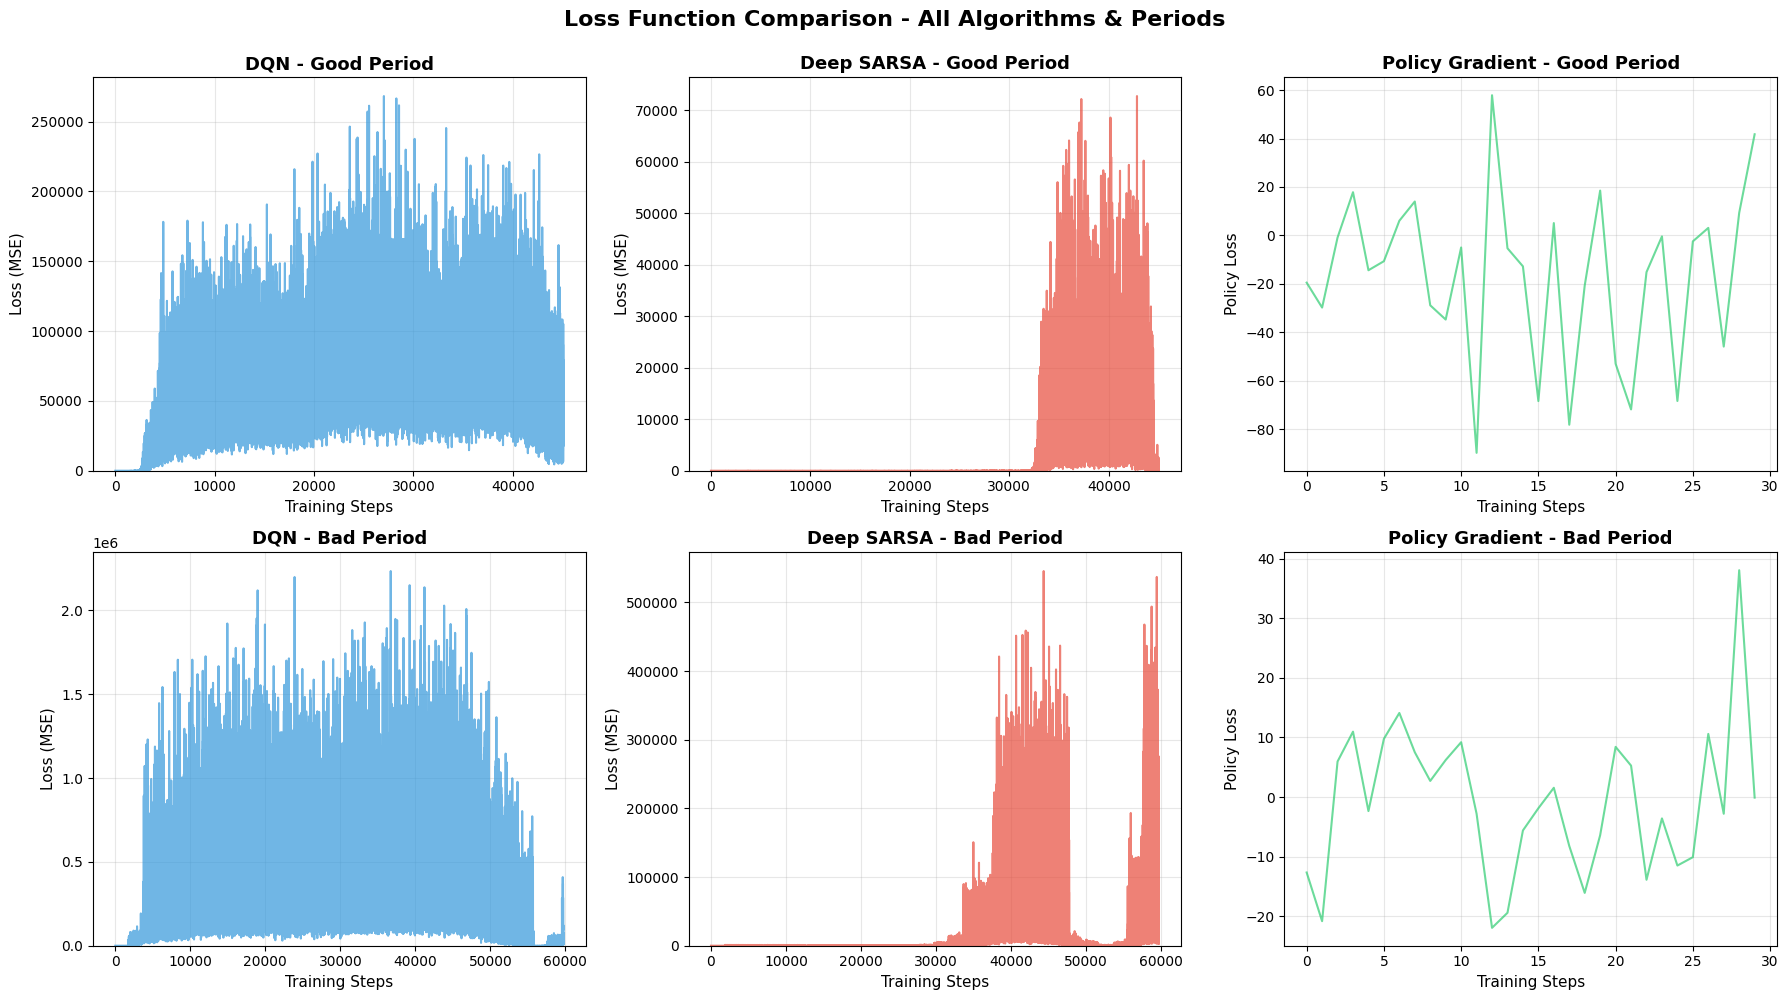

LOSS FUNCTION STATISTICS SUMMARY

      Algorithm Period     Mean Loss      Std Loss   Final Loss
            DQN   Good  57373.396185  33724.247700 68344.023438
            DQN    Bad 309447.879064 273738.454508 97316.640625
     Deep SARSA   Good   2318.951457   5704.102903   235.119263
     Deep SARSA    Bad  11398.400098  31502.049449 42589.480469
Policy Gradient   Good    -16.724106     34.527670    41.763653
Policy Gradient    Bad     -0.998221     12.358499    -0.101112


In [ ]:
# Combined Loss Comparison - All algorithms and periods
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Loss Function Comparison - All Algorithms & Periods', 
             fontsize=16, fontweight='bold', y=0.995)

# Good Period - Row 1
axes[0, 0].plot(dqn_good.loss_history, color='#3498db', linewidth=1.5, alpha=0.7)
axes[0, 0].set_title('DQN - Good Period', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Training Steps', fontsize=11)
axes[0, 0].set_ylabel('Loss (MSE)', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(bottom=0)

axes[0, 1].plot(sarsa_good.loss_history, color='#e74c3c', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Deep SARSA - Good Period', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Training Steps', fontsize=11)
axes[0, 1].set_ylabel('Loss (MSE)', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(bottom=0)

axes[0, 2].plot(pg_good.loss_history, color='#2ecc71', linewidth=1.5, alpha=0.7)
axes[0, 2].set_title('Policy Gradient - Good Period', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Training Steps', fontsize=11)
axes[0, 2].set_ylabel('Policy Loss', fontsize=11)
axes[0, 2].grid(True, alpha=0.3)

# Bad Period - Row 2
axes[1, 0].plot(dqn_bad.loss_history, color='#3498db', linewidth=1.5, alpha=0.7)
axes[1, 0].set_title('DQN - Bad Period', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Training Steps', fontsize=11)
axes[1, 0].set_ylabel('Loss (MSE)', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(bottom=0)

axes[1, 1].plot(sarsa_bad.loss_history, color='#e74c3c', linewidth=1.5, alpha=0.7)
axes[1, 1].set_title('Deep SARSA - Bad Period', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Training Steps', fontsize=11)
axes[1, 1].set_ylabel('Loss (MSE)', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(bottom=0)

axes[1, 2].plot(pg_bad.loss_history, color='#2ecc71', linewidth=1.5, alpha=0.7)
axes[1, 2].set_title('Policy Gradient - Bad Period', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Training Steps', fontsize=11)
axes[1, 2].set_ylabel('Policy Loss', fontsize=11)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("="*80)
print("LOSS FUNCTION STATISTICS SUMMARY")
print("="*80)
loss_stats = pd.DataFrame({
    'Algorithm': ['DQN', 'DQN', 'Deep SARSA', 'Deep SARSA', 'Policy Gradient', 'Policy Gradient'],
    'Period': ['Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad'],
    'Mean Loss': [
        np.mean(dqn_good.loss_history),
        np.mean(dqn_bad.loss_history),
        np.mean(sarsa_good.loss_history),
        np.mean(sarsa_bad.loss_history),
        np.mean(pg_good.loss_history),
        np.mean(pg_bad.loss_history)
    ],
    'Std Loss': [
        np.std(dqn_good.loss_history),
        np.std(dqn_bad.loss_history),
        np.std(sarsa_good.loss_history),
        np.std(sarsa_bad.loss_history),
        np.std(pg_good.loss_history),
        np.std(pg_bad.loss_history)
    ],
    'Final Loss': [
        dqn_good.loss_history[-1] if len(dqn_good.loss_history) > 0 else 0,
        dqn_bad.loss_history[-1] if len(dqn_bad.loss_history) > 0 else 0,
        sarsa_good.loss_history[-1] if len(sarsa_good.loss_history) > 0 else 0,
        sarsa_bad.loss_history[-1] if len(sarsa_bad.loss_history) > 0 else 0,
        pg_good.loss_history[-1] if len(pg_good.loss_history) > 0 else 0,
        pg_bad.loss_history[-1] if len(pg_bad.loss_history) > 0 else 0
    ]
})

print("\n" + loss_stats.to_string(index=False))